In [129]:
import cmath
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.fftpack import rfft, irfft, fftfreq, fft
from scipy import signal

In [130]:
#create sounds to experiment on
#phasor = amp * np.exp(1j * (2 * np.pi * freq * time + initPhase))  
freq_1 = 1000
freq_2 = 200
nData = 5 * 44100
time = np.arange(0,nData).T/44100
initPhase = numpy.pi / 2
amp = 1
phasor_high = amp * numpy.exp(1j * (2 * numpy.pi * freq_1 * time + initPhase))
phasor_low = amp * numpy.exp(1j * (2 * numpy.pi * freq_2 * time + initPhase))
test_phasor = phasor_high + phasor_low
ipd.Audio(phasor_high.real, rate = 44100)

In [131]:
ipd.Audio(phasor_low.real, rate=44100)

(0, 1000)

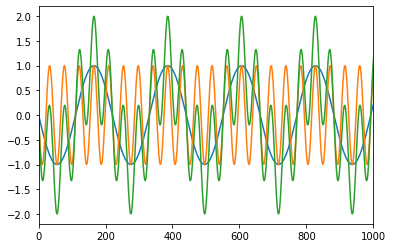

In [128]:
plt.plot(phasor_low.real)
plt.plot(phasor_high.real)
plt.plot(test_phasor.real)
plt.xlim(0, 1000)

In [104]:
ipd.Audio(test_phasor.real, rate = 44100)

In [138]:
w = numpy.fft.fft(test_phasor.real)
print(w)
freqs = numpy.fft.fftfreq(len(w))
print(freqs.max())
print(freqs.min())

[ 1.37286260e-11+0.00000000e+00j  7.13780399e-12+6.23630622e-11j
 -1.40805864e-11+1.76282230e-12j ... -4.46918740e-11+3.98871543e-11j
 -1.40805864e-11-1.76282230e-12j  7.13780399e-12-6.23630622e-11j]
0.4999954648526077
-0.5


In [141]:
idx = numpy.argmax(np.abs(w))
freq = freqs[idx]
print(freq)
freq_in_hertz = abs(freq * 44100)
print(freq_in_hertz)

-0.022675736961451247
1000.0


In [110]:
a = numpy.fft.ifft(w)

In [111]:
ipd.Audio(a, rate=44100)

C:\Users\frede\anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [112]:
W = fftfreq(nData, d=time[1]-time[0])
print(len(time))
f_signal = rfft(test_phasor.real)
# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W > 900)] = 0

cut_signal = irfft(cut_f_signal)

220500


In [113]:
ipd.Audio(cut_signal, rate=44100)

In [114]:
def highpass(input_, cutoff):
    W = fftfreq(220500, d=time[1]-time[0])
    f_signal = rfft(input_)
    # If our original signal time was in seconds, this is now in Hz    
    cut_f_signal = f_signal.copy()
    cut_f_signal[(W > cutoff)] = 0

    cut_signal = irfft(cut_f_signal)
    print(cut_signal)
    return cut_signal

In [115]:
ipd.Audio(highpass(test_phasor.real, 900), rate=44100)

[ 2.50227039e-13 -2.84913154e-02 -5.69594981e-02 ...  8.53814343e-02
  5.69594981e-02  2.84913154e-02]


In [153]:
A = fft(test_phasor.real)
print(len(test_phasor.real))

220500


In [154]:
B = fftfreq(len(test_phasor.real))


In [163]:
for i in range(len(A)):
    print(abs(B[i] * 44100))

0.0
0.19999999999999998
0.39999999999999997
0.6
0.7999999999999999
1.0
1.2
1.4
1.5999999999999999
1.8
2.0
2.2
2.4
2.5999999999999996
2.8
3.0
3.1999999999999997
3.4
3.6
3.8000000000000003
4.0
4.2
4.4
4.6000000000000005
4.8
5.0
5.199999999999999
5.3999999999999995
5.6
5.8
6.0
6.2
6.3999999999999995
6.6
6.8
7.0
7.2
7.4
7.6000000000000005
7.8
8.0
8.200000000000001
8.4
8.6
8.8
9.0
9.200000000000001
9.4
9.6
9.799999999999999
10.0
10.2
10.399999999999999
10.6
10.799999999999999
11.0
11.2
11.4
11.6
11.8
12.0
12.200000000000001
12.4
12.600000000000001
12.799999999999999
12.999999999999998
13.2
13.399999999999999
13.6
13.799999999999999
14.0
14.2
14.4
14.6
14.8
14.999999999999998
15.200000000000001
15.399999999999999
15.6
15.799999999999999
16.0
16.2
16.400000000000002
16.599999999999998
16.8
17.0
17.2
17.4
17.6
17.8
18.0
18.2
18.400000000000002
18.599999999999998
18.8
19.0
19.2
19.4
19.599999999999998
19.8
20.0
20.2
20.4
20.6
20.799999999999997
21.0
21.2
21.4
21.599999999999998
21.8
22.0
22.2
2

250.99999999999997
251.20000000000002
251.4
251.6
251.8
252.0
252.2
252.4
252.6
252.79999999999998
252.99999999999997
253.2
253.4
253.60000000000002
253.8
254.0
254.2
254.4
254.6
254.79999999999998
254.99999999999997
255.2
255.39999999999998
255.60000000000002
255.8
256.0
256.2
256.4
256.6
256.8
257.0
257.2
257.4
257.59999999999997
257.8
258.0
258.2
258.4
258.6
258.8
259.0
259.2
259.4
259.59999999999997
259.8
260.0
260.2
260.4
260.6
260.8
261.0
261.2
261.4
261.59999999999997
261.79999999999995
262.0
262.2
262.40000000000003
262.6
262.8
263.0
263.2
263.4
263.59999999999997
263.79999999999995
264.0
264.2
264.40000000000003
264.6
264.8
265.0
265.2
265.4
265.59999999999997
265.8
266.0
266.2
266.40000000000003
266.6
266.8
267.0
267.2
267.4
267.59999999999997
267.8
268.0
268.2
268.40000000000003
268.6
268.8
269.0
269.2
269.4
269.59999999999997
269.8
270.0
270.2
270.4
270.6
270.8
271.0
271.2
271.4
271.6
271.8
272.0
272.2
272.4
272.59999999999997
272.8
273.0
273.2
273.4
273.6
273.8
274.0
274.2

582.6
582.8
583.0
583.1999999999999
583.4
583.5999999999999
583.8
584.0
584.2
584.4
584.6
584.8000000000001
585.0
585.2
585.4
585.6
585.8
586.0
586.1999999999999
586.4
586.6
586.8
587.0
587.1999999999999
587.4
587.6
587.8
588.0
588.2
588.4
588.6
588.8000000000001
589.0
589.2
589.4
589.6
589.8
590.0
590.1999999999999
590.4
590.5999999999999
590.8
591.0
591.1999999999999
591.4
591.6
591.8
592.0
592.2
592.4
592.6
592.8
593.0
593.2
593.4
593.6
593.8
594.0
594.1999999999999
594.4
594.5999999999999
594.8
595.0
595.1999999999999
595.4
595.6
595.8000000000001
596.0
596.2
596.4
596.6
596.8
597.0
597.2
597.4
597.6
597.8
598.0
598.1999999999999
598.4
598.5999999999999
598.8
599.0
599.2
599.4
599.6
599.8000000000001
600.0
600.2
600.4
600.6
600.8
601.0
601.1999999999999
601.4
601.6
601.8
602.0
602.1999999999999
602.4
602.6
602.8
603.0
603.2
603.4
603.6
603.8000000000001
604.0
604.2
604.4
604.6
604.8
605.0
605.1999999999999
605.4
605.5999999999999
605.8
606.0
606.1999999999999
606.4
606.6
606.8
607.

842.8
843.0000000000001
843.2
843.4
843.5999999999999
843.8000000000001
844.0
844.1999999999999
844.4
844.6
844.8
845.0
845.2
845.4
845.6
845.8
846.0
846.2
846.4
846.5999999999999
846.8000000000001
847.0
847.1999999999999
847.4000000000001
847.6
847.8
847.9999999999999
848.2
848.4
848.5999999999999
848.8
849.0
849.2
849.4
849.6
849.8000000000001
850.0
850.1999999999999
850.4000000000001
850.6
850.8
850.9999999999999
851.2
851.4
851.5999999999999
851.8000000000001
852.0
852.1999999999999
852.4
852.6
852.8
853.0
853.1999999999999
853.4
853.6
853.8
854.0
854.2
854.4
854.5999999999999
854.8000000000001
855.0
855.1999999999999
855.3999999999999
855.6
855.8
856.0
856.2
856.4
856.6
856.8
857.0
857.2
857.4
857.5999999999999
857.8000000000001
858.0
858.1999999999999
858.4000000000001
858.6
858.8
858.9999999999999
859.2
859.4
859.5999999999999
859.8
860.0
860.1999999999999
860.4
860.6
860.8000000000001
861.0
861.1999999999999
861.4000000000001
861.6
861.8
861.9999999999999
862.2
862.4
862.599999

1218.6000000000001
1218.8
1219.0
1219.1999999999998
1219.4
1219.6
1219.8
1220.0
1220.2
1220.3999999999999
1220.6
1220.8
1221.0
1221.2
1221.3999999999999
1221.6000000000001
1221.8
1222.0
1222.1999999999998
1222.4
1222.6
1222.8
1223.0
1223.2
1223.3999999999999
1223.6
1223.8
1224.0
1224.2
1224.3999999999999
1224.6
1224.8
1225.0
1225.2
1225.4
1225.6
1225.8
1226.0
1226.2
1226.3999999999999
1226.6
1226.8
1227.0
1227.1999999999998
1227.4
1227.6
1227.8
1228.0
1228.2
1228.4
1228.6
1228.8
1229.0
1229.2
1229.3999999999999
1229.6000000000001
1229.8
1230.0
1230.1999999999998
1230.4
1230.6
1230.8
1231.0
1231.2
1231.3999999999999
1231.6
1231.8
1232.0
1232.2
1232.3999999999999
1232.6000000000001
1232.8
1233.0
1233.2
1233.4
1233.6
1233.8
1234.0
1234.2
1234.3999999999999
1234.6
1234.8
1235.0
1235.2
1235.4
1235.6
1235.8
1236.0
1236.2
1236.4
1236.6
1236.8
1237.0
1237.2
1237.3999999999999
1237.6000000000001
1237.8
1238.0
1238.1999999999998
1238.4
1238.6
1238.8
1239.0
1239.2
1239.4
1239.6
1239.8
1240.0
1240

1566.0
1566.1999999999998
1566.4
1566.6
1566.8
1567.0
1567.1999999999998
1567.3999999999999
1567.6000000000001
1567.8
1568.0
1568.2
1568.3999999999999
1568.6000000000001
1568.7999999999997
1569.0
1569.2
1569.3999999999999
1569.6
1569.8000000000002
1570.0
1570.2
1570.4
1570.6
1570.8
1570.9999999999998
1571.2
1571.4
1571.6
1571.8
1572.0
1572.1999999999998
1572.4
1572.6000000000001
1572.8
1573.0
1573.1999999999998
1573.3999999999999
1573.6000000000001
1573.8
1574.0
1574.2
1574.3999999999999
1574.6
1574.8000000000002
1575.0
1575.2
1575.3999999999999
1575.6
1575.8
1575.9999999999998
1576.2
1576.4
1576.6
1576.8
1577.0
1577.1999999999998
1577.4
1577.6
1577.8
1578.0
1578.1999999999998
1578.3999999999999
1578.6000000000001
1578.8
1579.0
1579.2
1579.3999999999999
1579.6
1579.7999999999997
1580.0
1580.2
1580.3999999999999
1580.6
1580.8000000000002
1580.9999999999998
1581.2
1581.4
1581.6
1581.8
1581.9999999999998
1582.2
1582.4
1582.6
1582.8
1583.0
1583.1999999999998
1583.4
1583.6000000000001
1583.

1924.0
1924.2
1924.3999999999999
1924.6
1924.8000000000002
1925.0
1925.2
1925.4
1925.6
1925.8
1925.9999999999998
1926.2
1926.4
1926.6
1926.8
1927.0
1927.1999999999998
1927.4
1927.6000000000001
1927.8
1928.0
1928.1999999999998
1928.3999999999999
1928.6000000000001
1928.8
1929.0
1929.2
1929.3999999999999
1929.6
1929.8000000000002
1930.0
1930.2
1930.3999999999999
1930.6
1930.8
1930.9999999999998
1931.2
1931.4
1931.6
1931.8
1932.0
1932.1999999999998
1932.4
1932.6
1932.8
1933.0
1933.1999999999998
1933.3999999999999
1933.6000000000001
1933.8
1934.0
1934.2
1934.3999999999999
1934.6000000000001
1934.7999999999997
1935.0
1935.2
1935.3999999999999
1935.6
1935.8000000000002
1936.0
1936.2
1936.4
1936.6
1936.8
1936.9999999999998
1937.2
1937.4
1937.6
1937.8
1938.0
1938.1999999999998
1938.4
1938.6000000000001
1938.8
1939.0
1939.1999999999998
1939.3999999999999
1939.6000000000001
1939.8
1940.0
1940.2
1940.3999999999999
1940.6
1940.8000000000002
1941.0
1941.2
1941.3999999999999
1941.6
1941.8
1941.99999

2214.0
2214.2
2214.3999999999996
2214.6
2214.8
2215.0
2215.2
2215.4
2215.6
2215.8
2216.0
2216.2
2216.4
2216.6
2216.7999999999997
2217.0
2217.2
2217.4
2217.6
2217.7999999999997
2218.0
2218.2
2218.4
2218.6
2218.7999999999997
2219.0
2219.2000000000003
2219.4
2219.6
2219.8
2220.0
2220.2
2220.3999999999996
2220.6
2220.8
2221.0
2221.2
2221.4
2221.6
2221.8
2222.0
2222.2
2222.4
2222.6
2222.7999999999997
2223.0
2223.2
2223.4
2223.6
2223.7999999999997
2224.0
2224.2000000000003
2224.4
2224.6
2224.8
2225.0
2225.2
2225.3999999999996
2225.6
2225.8
2226.0
2226.2
2226.4
2226.6
2226.8
2227.0
2227.2
2227.4
2227.6
2227.7999999999997
2228.0
2228.2
2228.4
2228.6
2228.7999999999997
2229.0
2229.2000000000003
2229.4
2229.6
2229.7999999999997
2230.0
2230.2000000000003
2230.3999999999996
2230.6
2230.8
2231.0
2231.2
2231.4
2231.6
2231.8
2232.0
2232.2
2232.4
2232.6
2232.8
2233.0
2233.2
2233.4
2233.6
2233.7999999999997
2234.0
2234.2
2234.4
2234.6
2234.7999999999997
2235.0
2235.2000000000003
2235.4
2235.6
2235.8
22

2515.6
2515.8
2516.0
2516.2
2516.4
2516.6
2516.8
2517.0
2517.2
2517.4
2517.6
2517.7999999999997
2518.0
2518.2
2518.4
2518.6
2518.7999999999997
2519.0
2519.2000000000003
2519.4
2519.6
2519.7999999999997
2520.0
2520.2
2520.3999999999996
2520.6
2520.8
2521.0
2521.2
2521.4
2521.6
2521.8
2522.0
2522.2
2522.4
2522.6
2522.7999999999997
2523.0
2523.2
2523.4
2523.6
2523.7999999999997
2524.0
2524.2
2524.4
2524.6
2524.7999999999997
2525.0
2525.2000000000003
2525.4
2525.6
2525.8
2526.0
2526.2
2526.3999999999996
2526.6
2526.8
2527.0
2527.2
2527.4
2527.6
2527.8
2528.0
2528.2
2528.4
2528.6
2528.7999999999997
2529.0
2529.2
2529.4
2529.6
2529.7999999999997
2530.0
2530.2000000000003
2530.4
2530.6
2530.7999999999997
2531.0
2531.2
2531.3999999999996
2531.6
2531.8
2532.0
2532.2
2532.4
2532.6
2532.8
2533.0
2533.2
2533.4
2533.6
2533.7999999999997
2534.0
2534.2
2534.4
2534.6
2534.7999999999997
2535.0
2535.2
2535.4
2535.6
2535.7999999999997
2536.0
2536.2000000000003
2536.3999999999996
2536.6
2536.8
2537.0
2537

2730.4
2730.6
2730.7999999999997
2731.0
2731.2
2731.4
2731.6
2731.7999999999997
2732.0
2732.2000000000003
2732.4
2732.6
2732.7999999999997
2733.0
2733.2
2733.3999999999996
2733.6
2733.8
2734.0
2734.2
2734.4
2734.6
2734.8
2735.0
2735.2
2735.4
2735.6
2735.7999999999997
2736.0
2736.2
2736.4
2736.6
2736.7999999999997
2737.0
2737.2
2737.4
2737.6
2737.7999999999997
2738.0
2738.2000000000003
2738.4
2738.6
2738.8
2739.0
2739.2
2739.3999999999996
2739.6
2739.8
2740.0
2740.2
2740.4
2740.6
2740.8
2741.0
2741.2
2741.4
2741.6
2741.7999999999997
2742.0
2742.2
2742.4
2742.6
2742.7999999999997
2743.0
2743.2000000000003
2743.4
2743.6
2743.7999999999997
2744.0
2744.2
2744.3999999999996
2744.6
2744.8
2745.0
2745.2
2745.4
2745.6
2745.8
2746.0
2746.2
2746.4
2746.6
2746.7999999999997
2747.0
2747.2
2747.4
2747.6
2747.7999999999997
2748.0
2748.2
2748.4
2748.6
2748.7999999999997
2749.0
2749.2000000000003
2749.3999999999996
2749.6
2749.8
2750.0
2750.2
2750.3999999999996
2750.6
2750.8
2751.0
2751.2
2751.4
2751.6

2930.4
2930.6000000000004
2930.7999999999997
2931.0
2931.2
2931.4
2931.6000000000004
2931.7999999999997
2932.0
2932.2
2932.4
2932.6
2932.8
2932.9999999999995
2933.2
2933.4
2933.6
2933.8
2933.9999999999995
2934.2
2934.4
2934.6
2934.8
2935.0000000000005
2935.2
2935.3999999999996
2935.6
2935.8
2936.0
2936.2
2936.3999999999996
2936.6
2936.8
2937.0
2937.2000000000003
2937.3999999999996
2937.6
2937.8
2938.0
2938.2000000000003
2938.3999999999996
2938.6
2938.7999999999997
2939.0
2939.2000000000003
2939.4
2939.6
2939.7999999999997
2940.0
2940.2000000000003
2940.4
2940.5999999999995
2940.7999999999997
2941.0
2941.2
2941.4
2941.6000000000004
2941.7999999999997
2942.0
2942.2
2942.4
2942.6000000000004
2942.7999999999997
2943.0
2943.2
2943.4
2943.6
2943.8
2943.9999999999995
2944.2
2944.4
2944.6
2944.8
2944.9999999999995
2945.2
2945.4
2945.6
2945.8
2946.0000000000005
2946.2
2946.3999999999996
2946.6
2946.8
2947.0
2947.2
2947.3999999999996
2947.6
2947.8
2948.0
2948.2000000000003
2948.3999999999996
294

3130.2
3130.4
3130.6
3130.8
3130.9999999999995
3131.2
3131.4
3131.6
3131.8
3132.0
3132.2
3132.3999999999996
3132.6
3132.8
3133.0
3133.2
3133.3999999999996
3133.6
3133.8
3134.0
3134.2000000000003
3134.3999999999996
3134.6
3134.7999999999997
3135.0
3135.2000000000003
3135.3999999999996
3135.6
3135.7999999999997
3136.0
3136.2000000000003
3136.4
3136.6
3136.7999999999997
3137.0
3137.2000000000003
3137.4
3137.5999999999995
3137.7999999999997
3138.0
3138.2
3138.4
3138.6000000000004
3138.7999999999997
3139.0
3139.2
3139.4
3139.6000000000004
3139.7999999999997
3140.0
3140.2
3140.4
3140.6
3140.8
3140.9999999999995
3141.2
3141.4
3141.6
3141.8
3141.9999999999995
3142.2
3142.4
3142.6
3142.8
3143.0
3143.2
3143.3999999999996
3143.6
3143.8
3144.0
3144.2
3144.3999999999996
3144.6
3144.8
3145.0
3145.2000000000003
3145.3999999999996
3145.6
3145.7999999999997
3146.0
3146.2000000000003
3146.3999999999996
3146.6
3146.7999999999997
3147.0
3147.2000000000003
3147.4
3147.6
3147.7999999999997
3148.0
3148.20000

3330.2
3330.3999999999996
3330.6
3330.8
3331.0
3331.2000000000003
3331.3999999999996
3331.6
3331.7999999999997
3332.0
3332.2000000000003
3332.3999999999996
3332.6
3332.7999999999997
3333.0
3333.2000000000003
3333.4
3333.6
3333.7999999999997
3334.0
3334.2
3334.4
3334.5999999999995
3334.7999999999997
3335.0
3335.2
3335.4
3335.6000000000004
3335.7999999999997
3336.0
3336.2
3336.4
3336.6000000000004
3336.7999999999997
3336.9999999999995
3337.2
3337.4
3337.6
3337.8
3337.9999999999995
3338.2
3338.4
3338.6
3338.8
3338.9999999999995
3339.2
3339.4
3339.6
3339.8
3340.0
3340.2
3340.3999999999996
3340.6
3340.8
3341.0
3341.2
3341.3999999999996
3341.6
3341.8
3342.0
3342.2000000000003
3342.3999999999996
3342.6
3342.7999999999997
3343.0
3343.2000000000003
3343.3999999999996
3343.6
3343.7999999999997
3344.0
3344.2000000000003
3344.4
3344.6
3344.7999999999997
3345.0
3345.2
3345.4
3345.5999999999995
3345.7999999999997
3346.0
3346.2
3346.4
3346.6000000000004
3346.7999999999997
3347.0
3347.2
3347.4
3347.60

3530.0
3530.2000000000003
3530.4
3530.6
3530.7999999999997
3531.0
3531.2
3531.4
3531.6000000000004
3531.7999999999997
3532.0
3532.2
3532.4
3532.6000000000004
3532.7999999999997
3533.0
3533.2
3533.4
3533.6
3533.8
3533.9999999999995
3534.2
3534.4
3534.6
3534.8
3534.9999999999995
3535.2
3535.4
3535.6
3535.8
3536.0000000000005
3536.2
3536.3999999999996
3536.6
3536.8
3537.0
3537.2
3537.3999999999996
3537.6
3537.8
3538.0
3538.2000000000003
3538.3999999999996
3538.6
3538.8
3539.0
3539.2000000000003
3539.3999999999996
3539.6
3539.7999999999997
3540.0
3540.2000000000003
3540.4
3540.6
3540.7999999999997
3541.0
3541.2000000000003
3541.4
3541.5999999999995
3541.7999999999997
3542.0
3542.2
3542.4
3542.6000000000004
3542.7999999999997
3543.0
3543.2
3543.4
3543.6000000000004
3543.7999999999997
3544.0
3544.2
3544.4
3544.6
3544.8
3544.9999999999995
3545.2
3545.4
3545.6
3545.8
3545.9999999999995
3546.2
3546.4
3546.6
3546.8
3547.0000000000005
3547.2
3547.3999999999996
3547.6
3547.8
3548.0
3548.2
3548.399

3829.9999999999995
3830.2
3830.4
3830.6
3830.8
3831.0000000000005
3831.2
3831.3999999999996
3831.6
3831.8
3832.0
3832.2
3832.3999999999996
3832.6
3832.8
3833.0
3833.2000000000003
3833.3999999999996
3833.6
3833.8
3834.0
3834.2000000000003
3834.3999999999996
3834.6
3834.7999999999997
3835.0
3835.2000000000003
3835.4
3835.6
3835.7999999999997
3836.0
3836.2000000000003
3836.4
3836.5999999999995
3836.7999999999997
3837.0
3837.2
3837.4
3837.6000000000004
3837.7999999999997
3838.0
3838.2
3838.4
3838.6000000000004
3838.7999999999997
3839.0
3839.2
3839.4
3839.6
3839.8
3839.9999999999995
3840.2
3840.4
3840.6
3840.8
3840.9999999999995
3841.2
3841.4
3841.6
3841.8
3842.0000000000005
3842.2
3842.3999999999996
3842.6
3842.8
3843.0
3843.2
3843.3999999999996
3843.6
3843.8
3844.0
3844.2000000000003
3844.3999999999996
3844.6
3844.8
3845.0
3845.2000000000003
3845.3999999999996
3845.6
3845.7999999999997
3846.0
3846.2000000000003
3846.4
3846.6
3846.7999999999997
3847.0
3847.2000000000003
3847.4
3847.5999999

4129.8
4130.0
4130.2
4130.4
4130.599999999999
4130.8
4131.0
4131.2
4131.400000000001
4131.599999999999
4131.8
4132.0
4132.2
4132.400000000001
4132.599999999999
4132.8
4133.0
4133.2
4133.4
4133.6
4133.799999999999
4134.0
4134.2
4134.4
4134.6
4134.799999999999
4135.0
4135.2
4135.4
4135.6
4135.8
4136.0
4136.2
4136.4
4136.6
4136.8
4137.0
4137.2
4137.4
4137.6
4137.8
4138.0
4138.2
4138.4
4138.599999999999
4138.8
4139.0
4139.2
4139.4
4139.599999999999
4139.8
4140.0
4140.2
4140.4
4140.599999999999
4140.8
4141.0
4141.2
4141.400000000001
4141.599999999999
4141.8
4142.0
4142.2
4142.400000000001
4142.599999999999
4142.8
4143.0
4143.2
4143.400000000001
4143.6
4143.8
4144.0
4144.2
4144.4
4144.6
4144.799999999999
4145.0
4145.2
4145.4
4145.6
4145.8
4146.0
4146.2
4146.4
4146.6
4146.8
4147.0
4147.2
4147.4
4147.6
4147.8
4148.0
4148.2
4148.4
4148.6
4148.8
4149.0
4149.2
4149.4
4149.599999999999
4149.8
4150.0
4150.2
4150.4
4150.599999999999
4150.8
4151.0
4151.2
4151.4
4151.599999999999
4151.8
4152.0
4152.2


4418.4
4418.6
4418.799999999999
4419.0
4419.2
4419.4
4419.6
4419.8
4420.0
4420.2
4420.4
4420.6
4420.8
4421.0
4421.2
4421.4
4421.6
4421.8
4422.0
4422.2
4422.4
4422.599999999999
4422.8
4423.0
4423.2
4423.4
4423.599999999999
4423.8
4424.0
4424.2
4424.4
4424.599999999999
4424.8
4425.0
4425.2
4425.4
4425.599999999999
4425.8
4426.0
4426.2
4426.400000000001
4426.599999999999
4426.8
4427.0
4427.2
4427.400000000001
4427.599999999999
4427.8
4428.0
4428.2
4428.4
4428.6
4428.799999999999
4429.0
4429.2
4429.4
4429.6
4429.799999999999
4430.0
4430.2
4430.4
4430.6
4430.8
4431.0
4431.2
4431.4
4431.6
4431.8
4432.0
4432.2
4432.4
4432.6
4432.8
4433.0
4433.2
4433.4
4433.599999999999
4433.8
4434.0
4434.2
4434.4
4434.599999999999
4434.8
4435.0
4435.2
4435.4
4435.599999999999
4435.8
4436.0
4436.2
4436.4
4436.599999999999
4436.8
4437.0
4437.2
4437.400000000001
4437.599999999999
4437.8
4438.0
4438.2
4438.400000000001
4438.599999999999
4438.8
4439.0
4439.2
4439.4
4439.6
4439.799999999999
4440.0
4440.2
4440.4
444

4729.599999999999
4729.8
4730.0
4730.2
4730.4
4730.599999999999
4730.8
4731.0
4731.2
4731.4
4731.599999999999
4731.8
4732.0
4732.2
4732.400000000001
4732.599999999999
4732.8
4733.0
4733.2
4733.400000000001
4733.599999999999
4733.8
4734.0
4734.2
4734.4
4734.6
4734.799999999999
4735.0
4735.2
4735.4
4735.6
4735.799999999999
4736.0
4736.2
4736.4
4736.6
4736.8
4737.0
4737.2
4737.4
4737.6
4737.8
4738.0
4738.2
4738.4
4738.6
4738.8
4739.0
4739.2
4739.4
4739.599999999999
4739.8
4740.0
4740.2
4740.4
4740.599999999999
4740.8
4741.0
4741.2
4741.4
4741.599999999999
4741.8
4742.0
4742.2
4742.4
4742.599999999999
4742.8
4743.0
4743.2
4743.400000000001
4743.599999999999
4743.8
4744.0
4744.2
4744.400000000001
4744.599999999999
4744.8
4745.0
4745.2
4745.4
4745.6
4745.799999999999
4746.0
4746.2
4746.4
4746.6
4746.799999999999
4747.0
4747.2
4747.4
4747.6
4747.8
4748.0
4748.2
4748.4
4748.6
4748.8
4749.0
4749.2
4749.4
4749.6
4749.8
4750.0
4750.2
4750.4
4750.599999999999
4750.8
4751.0
4751.2
4751.4
4751.59999

5121.8
5122.0
5122.2
5122.4
5122.599999999999
5122.8
5123.0
5123.2
5123.4
5123.599999999999
5123.8
5124.0
5124.2
5124.4
5124.599999999999
5124.8
5125.0
5125.2
5125.400000000001
5125.599999999999
5125.8
5126.0
5126.2
5126.400000000001
5126.599999999999
5126.8
5127.0
5127.2
5127.4
5127.6
5127.799999999999
5128.0
5128.2
5128.4
5128.6
5128.799999999999
5129.0
5129.2
5129.4
5129.6
5129.8
5130.0
5130.2
5130.4
5130.6
5130.8
5131.0
5131.2
5131.4
5131.6
5131.8
5132.0
5132.2
5132.4
5132.6
5132.8
5133.0
5133.2
5133.4
5133.599999999999
5133.8
5134.0
5134.2
5134.4
5134.599999999999
5134.8
5135.0
5135.2
5135.4
5135.599999999999
5135.8
5136.0
5136.2
5136.400000000001
5136.599999999999
5136.8
5137.0
5137.2
5137.400000000001
5137.599999999999
5137.8
5138.0
5138.2
5138.4
5138.6
5138.799999999999
5139.0
5139.2
5139.4
5139.6
5139.799999999999
5140.0
5140.2
5140.4
5140.6
5140.8
5141.0
5141.2
5141.4
5141.6
5141.8
5142.0
5142.2
5142.4
5142.6
5142.8
5143.0
5143.2
5143.4
5143.6
5143.8
5144.0
5144.2
5144.4
5144

5429.4
5429.599999999999
5429.8
5430.0
5430.2
5430.4
5430.599999999999
5430.8
5431.0
5431.2
5431.400000000001
5431.599999999999
5431.8
5432.0
5432.2
5432.400000000001
5432.599999999999
5432.8
5433.0
5433.2
5433.4
5433.6
5433.799999999999
5434.0
5434.2
5434.4
5434.6
5434.799999999999
5435.0
5435.2
5435.4
5435.6
5435.8
5436.0
5436.2
5436.4
5436.6
5436.8
5437.0
5437.2
5437.4
5437.6
5437.8
5438.0
5438.2
5438.4
5438.6
5438.8
5439.0
5439.2
5439.4
5439.599999999999
5439.8
5440.0
5440.2
5440.4
5440.599999999999
5440.8
5441.0
5441.2
5441.4
5441.599999999999
5441.8
5442.0
5442.2
5442.400000000001
5442.599999999999
5442.8
5443.0
5443.2
5443.400000000001
5443.599999999999
5443.8
5444.0
5444.2
5444.4
5444.6
5444.799999999999
5445.0
5445.2
5445.4
5445.6
5445.799999999999
5446.0
5446.2
5446.4
5446.6
5446.8
5447.0
5447.2
5447.4
5447.6
5447.8
5448.0
5448.2
5448.4
5448.6
5448.8
5449.0
5449.2
5449.4
5449.6
5449.8
5450.0
5450.2
5450.4
5450.599999999999
5450.8
5451.0
5451.2
5451.4
5451.599999999999
5451.8


5829.4
5829.6
5829.8
5830.0
5830.200000000001
5830.400000000001
5830.599999999999
5830.799999999999
5831.0
5831.2
5831.4
5831.6
5831.8
5832.0
5832.2
5832.400000000001
5832.6
5832.799999999999
5832.999999999999
5833.2
5833.4
5833.599999999999
5833.8
5834.0
5834.2
5834.400000000001
5834.6
5834.8
5834.999999999999
5835.2
5835.4
5835.599999999999
5835.8
5836.0
5836.2
5836.400000000001
5836.6
5836.8
5837.000000000001
5837.2
5837.4
5837.599999999999
5837.799999999999
5838.0
5838.2
5838.4
5838.6
5838.8
5839.0
5839.200000000001
5839.4
5839.599999999999
5839.799999999999
5840.0
5840.2
5840.4
5840.6
5840.8
5841.0
5841.200000000001
5841.400000000001
5841.599999999999
5841.799999999999
5842.0
5842.2
5842.4
5842.6
5842.8
5843.0
5843.2
5843.400000000001
5843.6
5843.799999999999
5843.999999999999
5844.2
5844.4
5844.599999999999
5844.8
5845.0
5845.2
5845.400000000001
5845.6
5845.8
5845.999999999999
5846.2
5846.4
5846.599999999999
5846.8
5847.0
5847.2
5847.400000000001
5847.6
5847.8
5848.000000000001
5

6129.2
6129.400000000001
6129.6
6129.8
6129.999999999999
6130.2
6130.4
6130.599999999999
6130.8
6131.0
6131.2
6131.400000000001
6131.6
6131.8
6132.000000000001
6132.2
6132.4
6132.599999999999
6132.799999999999
6133.0
6133.2
6133.4
6133.6
6133.8
6134.0
6134.200000000001
6134.4
6134.599999999999
6134.799999999999
6135.0
6135.2
6135.4
6135.6
6135.8
6136.0
6136.200000000001
6136.400000000001
6136.599999999999
6136.799999999999
6137.0
6137.2
6137.4
6137.6
6137.8
6138.0
6138.2
6138.400000000001
6138.6
6138.799999999999
6138.999999999999
6139.2
6139.4
6139.599999999999
6139.8
6140.0
6140.2
6140.400000000001
6140.6
6140.8
6140.999999999999
6141.2
6141.4
6141.599999999999
6141.8
6142.0
6142.2
6142.400000000001
6142.6
6142.8
6143.000000000001
6143.2
6143.4
6143.599999999999
6143.799999999999
6144.0
6144.2
6144.4
6144.6
6144.8
6145.0
6145.200000000001
6145.4
6145.599999999999
6145.799999999999
6146.0
6146.2
6146.4
6146.6
6146.8
6147.0
6147.200000000001
6147.400000000001
6147.599999999999
6147.799

6429.200000000001
6429.4
6429.599999999999
6429.799999999999
6430.0
6430.2
6430.4
6430.6
6430.8
6431.0
6431.200000000001
6431.400000000001
6431.599999999999
6431.799999999999
6432.0
6432.2
6432.4
6432.6
6432.8
6433.0
6433.2
6433.400000000001
6433.6
6433.799999999999
6433.999999999999
6434.2
6434.4
6434.599999999999
6434.8
6435.0
6435.2
6435.400000000001
6435.6
6435.8
6435.999999999999
6436.2
6436.4
6436.599999999999
6436.8
6437.0
6437.2
6437.400000000001
6437.6
6437.8
6438.000000000001
6438.2
6438.4
6438.599999999999
6438.799999999999
6439.0
6439.2
6439.4
6439.6
6439.8
6440.0
6440.200000000001
6440.4
6440.599999999999
6440.799999999999
6441.0
6441.2
6441.4
6441.6
6441.8
6442.0
6442.200000000001
6442.400000000001
6442.599999999999
6442.799999999999
6443.0
6443.2
6443.4
6443.6
6443.8
6444.0
6444.2
6444.400000000001
6444.6
6444.799999999999
6444.999999999999
6445.2
6445.4
6445.599999999999
6445.8
6446.0
6446.2
6446.400000000001
6446.6
6446.8
6446.999999999999
6447.2
6447.4
6447.5999999999

6738.4
6738.6
6738.8
6739.0
6739.2
6739.400000000001
6739.6
6739.799999999999
6739.999999999999
6740.2
6740.4
6740.599999999999
6740.8
6741.0
6741.2
6741.400000000001
6741.6
6741.8
6741.999999999999
6742.2
6742.4
6742.599999999999
6742.8
6743.0
6743.2
6743.400000000001
6743.6
6743.8
6744.000000000001
6744.2
6744.4
6744.599999999999
6744.799999999999
6745.0
6745.2
6745.4
6745.6
6745.8
6746.0
6746.200000000001
6746.4
6746.599999999999
6746.799999999999
6747.0
6747.2
6747.4
6747.6
6747.8
6748.0
6748.200000000001
6748.400000000001
6748.599999999999
6748.799999999999
6749.0
6749.2
6749.4
6749.6
6749.8
6750.0
6750.2
6750.400000000001
6750.6
6750.799999999999
6750.999999999999
6751.2
6751.4
6751.599999999999
6751.8
6752.0
6752.2
6752.400000000001
6752.6
6752.8
6752.999999999999
6753.2
6753.4
6753.599999999999
6753.8
6754.0
6754.2
6754.400000000001
6754.6
6754.8
6755.000000000001
6755.2
6755.4
6755.599999999999
6755.799999999999
6756.0
6756.2
6756.4
6756.6
6756.8
6757.0
6757.200000000001
6757.

7029.0
7029.2
7029.4
7029.6
7029.8
7030.0
7030.200000000001
7030.4
7030.599999999999
7030.799999999999
7031.0
7031.2
7031.4
7031.6
7031.8
7032.0
7032.200000000001
7032.400000000001
7032.599999999999
7032.799999999999
7033.0
7033.2
7033.4
7033.6
7033.8
7034.0
7034.2
7034.400000000001
7034.6
7034.799999999999
7034.999999999999
7035.2
7035.4
7035.599999999999
7035.8
7036.0
7036.2
7036.400000000001
7036.6
7036.8
7036.999999999999
7037.2
7037.4
7037.599999999999
7037.8
7038.0
7038.2
7038.400000000001
7038.6
7038.8
7039.000000000001
7039.2
7039.4
7039.599999999999
7039.799999999999
7040.0
7040.2
7040.4
7040.6
7040.8
7041.0
7041.200000000001
7041.4
7041.599999999999
7041.799999999999
7042.0
7042.2
7042.4
7042.6
7042.8
7043.0
7043.200000000001
7043.400000000001
7043.599999999999
7043.799999999999
7044.0
7044.2
7044.4
7044.6
7044.8
7045.0
7045.2
7045.400000000001
7045.6
7045.799999999999
7045.999999999999
7046.2
7046.4
7046.599999999999
7046.8
7047.0
7047.2
7047.400000000001
7047.6
7047.8
7047.

7357.0
7357.2
7357.4
7357.6
7357.8
7358.0
7358.200000000001
7358.4
7358.599999999999
7358.799999999999
7359.0
7359.2
7359.4
7359.6
7359.8
7360.0
7360.200000000001
7360.400000000001
7360.599999999999
7360.799999999999
7361.0
7361.2
7361.4
7361.6
7361.8
7362.0
7362.2
7362.400000000001
7362.6
7362.799999999999
7362.999999999999
7363.2
7363.4
7363.599999999999
7363.8
7364.0
7364.2
7364.400000000001
7364.6
7364.8
7364.999999999999
7365.2
7365.4
7365.599999999999
7365.8
7366.0
7366.2
7366.400000000001
7366.6
7366.8
7367.000000000001
7367.199999999999
7367.4
7367.599999999999
7367.799999999999
7368.0
7368.2
7368.4
7368.6
7368.8
7369.0
7369.200000000001
7369.4
7369.599999999999
7369.799999999999
7370.0
7370.2
7370.4
7370.6
7370.8
7371.0
7371.200000000001
7371.400000000001
7371.599999999999
7371.799999999999
7372.0
7372.2
7372.4
7372.6
7372.8
7373.0
7373.2
7373.400000000001
7373.6
7373.799999999999
7373.999999999999
7374.2
7374.4
7374.599999999999
7374.8
7375.0
7375.2
7375.400000000001
7375.6
7

7734.0
7734.2
7734.400000000001
7734.6
7734.799999999999
7734.999999999999
7735.2
7735.4
7735.599999999999
7735.8
7736.0
7736.2
7736.400000000001
7736.6
7736.8
7736.999999999999
7737.2
7737.4
7737.599999999999
7737.8
7738.0
7738.2
7738.400000000001
7738.6
7738.8
7739.0
7739.199999999999
7739.4
7739.599999999999
7739.799999999999
7740.0
7740.2
7740.4
7740.6
7740.8
7741.0
7741.200000000001
7741.4
7741.599999999999
7741.799999999999
7742.0
7742.2
7742.4
7742.6
7742.8
7743.0
7743.200000000001
7743.400000000001
7743.599999999999
7743.799999999999
7744.0
7744.2
7744.4
7744.599999999999
7744.8
7745.0
7745.2
7745.400000000001
7745.6
7745.799999999999
7745.999999999999
7746.2
7746.4
7746.599999999999
7746.8
7747.0
7747.2
7747.400000000001
7747.6
7747.8
7747.999999999999
7748.2
7748.4
7748.599999999999
7748.8
7749.0
7749.2
7749.400000000001
7749.6
7749.8
7750.0
7750.199999999999
7750.4
7750.599999999999
7750.799999999999
7751.0
7751.2
7751.4
7751.6
7751.8
7752.0
7752.200000000001
7752.4
7752.599

8066.0
8066.2
8066.400000000001
8066.6
8066.8
8067.0
8067.199999999999
8067.4
8067.599999999999
8067.799999999999
8068.0
8068.2
8068.4
8068.6
8068.8
8069.0
8069.200000000001
8069.4
8069.599999999999
8069.799999999999
8070.0
8070.2
8070.4
8070.6
8070.8
8071.0
8071.200000000001
8071.400000000001
8071.599999999999
8071.799999999999
8071.999999999999
8072.2
8072.4
8072.599999999999
8072.8
8073.0
8073.2
8073.400000000001
8073.6
8073.799999999999
8073.999999999999
8074.2
8074.4
8074.599999999999
8074.8
8075.0
8075.2
8075.400000000001
8075.6
8075.8
8075.999999999999
8076.2
8076.4
8076.599999999999
8076.8
8077.0
8077.2
8077.400000000001
8077.6
8077.8
8078.0
8078.199999999999
8078.4
8078.599999999999
8078.799999999999
8079.0
8079.2
8079.4
8079.6
8079.8
8080.0
8080.200000000001
8080.4
8080.599999999999
8080.799999999999
8081.0
8081.2
8081.4
8081.6
8081.8
8082.0
8082.200000000001
8082.400000000001
8082.599999999999
8082.799999999999
8082.999999999999
8083.2
8083.4
8083.599999999999
8083.8
8084.0


8428.6
8428.8
8429.0
8429.2
8429.4
8429.6
8429.800000000001
8430.0
8430.2
8430.4
8430.599999999999
8430.8
8431.0
8431.199999999999
8431.4
8431.6
8431.8
8432.0
8432.2
8432.4
8432.599999999999
8432.8
8433.0
8433.199999999999
8433.4
8433.6
8433.8
8434.0
8434.2
8434.4
8434.6
8434.8
8435.0
8435.199999999999
8435.4
8435.6
8435.8
8436.0
8436.2
8436.4
8436.6
8436.800000000001
8437.0
8437.199999999999
8437.4
8437.6
8437.8
8438.0
8438.2
8438.4
8438.6
8438.800000000001
8439.0
8439.199999999999
8439.4
8439.6
8439.8
8440.0
8440.2
8440.4
8440.6
8440.800000000001
8441.0
8441.2
8441.4
8441.599999999999
8441.8
8442.0
8442.199999999999
8442.4
8442.6
8442.8
8443.0
8443.2
8443.4
8443.599999999999
8443.8
8444.0
8444.199999999999
8444.4
8444.6
8444.8
8445.0
8445.2
8445.4
8445.6
8445.8
8446.0
8446.199999999999
8446.4
8446.6
8446.8
8447.0
8447.2
8447.4
8447.6
8447.800000000001
8448.0
8448.199999999999
8448.4
8448.6
8448.8
8449.0
8449.2
8449.4
8449.6
8449.800000000001
8450.0
8450.199999999999
8450.4
8450.6
845

8728.4
8728.6
8728.8
8729.0
8729.2
8729.4
8729.6
8729.8
8730.0
8730.199999999999
8730.4
8730.6
8730.8
8731.0
8731.2
8731.4
8731.6
8731.800000000001
8732.0
8732.199999999999
8732.4
8732.6
8732.8
8733.0
8733.2
8733.4
8733.6
8733.800000000001
8734.0
8734.199999999999
8734.4
8734.6
8734.8
8735.0
8735.2
8735.4
8735.6
8735.800000000001
8736.0
8736.2
8736.4
8736.599999999999
8736.8
8737.0
8737.199999999999
8737.4
8737.6
8737.8
8738.0
8738.2
8738.4
8738.599999999999
8738.8
8739.0
8739.199999999999
8739.4
8739.6
8739.8
8740.0
8740.2
8740.4
8740.6
8740.8
8741.0
8741.199999999999
8741.4
8741.6
8741.8
8742.0
8742.2
8742.4
8742.6
8742.800000000001
8743.0
8743.199999999999
8743.4
8743.6
8743.8
8744.0
8744.2
8744.4
8744.6
8744.800000000001
8745.0
8745.199999999999
8745.4
8745.6
8745.8
8746.0
8746.2
8746.4
8746.6
8746.800000000001
8747.0
8747.2
8747.4
8747.599999999999
8747.8
8748.0
8748.199999999999
8748.4
8748.6
8748.8
8749.0
8749.2
8749.4
8749.599999999999
8749.8
8750.0
8750.199999999999
8750.4
875

9021.6
9021.8
9022.0
9022.2
9022.4
9022.599999999999
9022.8
9023.0
9023.199999999999
9023.4
9023.6
9023.8
9024.0
9024.2
9024.4
9024.6
9024.8
9025.0
9025.199999999999
9025.4
9025.6
9025.8
9026.0
9026.2
9026.4
9026.6
9026.800000000001
9027.0
9027.199999999999
9027.4
9027.6
9027.8
9028.0
9028.2
9028.4
9028.6
9028.800000000001
9029.0
9029.199999999999
9029.4
9029.6
9029.8
9030.0
9030.2
9030.4
9030.6
9030.800000000001
9031.0
9031.2
9031.4
9031.599999999999
9031.8
9032.0
9032.199999999999
9032.4
9032.6
9032.8
9033.0
9033.2
9033.4
9033.599999999999
9033.8
9034.0
9034.199999999999
9034.4
9034.6
9034.8
9035.0
9035.2
9035.4
9035.6
9035.8
9036.0
9036.199999999999
9036.4
9036.6
9036.8
9037.0
9037.2
9037.4
9037.6
9037.800000000001
9038.0
9038.199999999999
9038.4
9038.6
9038.8
9039.0
9039.2
9039.4
9039.6
9039.800000000001
9040.0
9040.199999999999
9040.4
9040.6
9040.8
9041.0
9041.2
9041.4
9041.6
9041.800000000001
9042.0
9042.2
9042.4
9042.599999999999
9042.8
9043.0
9043.199999999999
9043.4
9043.6
904

9328.2
9328.4
9328.599999999999
9328.8
9329.0
9329.199999999999
9329.4
9329.6
9329.8
9330.0
9330.2
9330.4
9330.6
9330.8
9331.0
9331.199999999999
9331.4
9331.6
9331.8
9332.0
9332.2
9332.4
9332.6
9332.800000000001
9333.0
9333.199999999999
9333.4
9333.6
9333.8
9334.0
9334.2
9334.4
9334.6
9334.800000000001
9335.0
9335.199999999999
9335.4
9335.6
9335.8
9336.0
9336.2
9336.4
9336.6
9336.800000000001
9337.0
9337.2
9337.4
9337.599999999999
9337.8
9338.0
9338.199999999999
9338.4
9338.6
9338.8
9339.0
9339.2
9339.4
9339.599999999999
9339.8
9340.0
9340.199999999999
9340.4
9340.6
9340.8
9341.0
9341.2
9341.4
9341.6
9341.8
9342.0
9342.199999999999
9342.4
9342.6
9342.8
9343.0
9343.2
9343.4
9343.6
9343.800000000001
9344.0
9344.199999999999
9344.4
9344.6
9344.8
9345.0
9345.2
9345.4
9345.6
9345.800000000001
9346.0
9346.199999999999
9346.4
9346.6
9346.8
9347.0
9347.2
9347.4
9347.6
9347.8
9348.0
9348.2
9348.4
9348.599999999999
9348.8
9349.0
9349.199999999999
9349.4
9349.6
9349.8
9350.0
9350.2
9350.4
9350.59

9628.199999999999
9628.4
9628.6
9628.8
9629.0
9629.2
9629.4
9629.6
9629.800000000001
9630.0
9630.199999999999
9630.4
9630.6
9630.8
9631.0
9631.2
9631.4
9631.6
9631.800000000001
9632.0
9632.2
9632.4
9632.599999999999
9632.8
9633.0
9633.199999999999
9633.4
9633.6
9633.8
9634.0
9634.2
9634.4
9634.599999999999
9634.8
9635.0
9635.199999999999
9635.4
9635.6
9635.8
9636.0
9636.2
9636.4
9636.6
9636.8
9637.0
9637.199999999999
9637.4
9637.6
9637.8
9638.0
9638.2
9638.4
9638.6
9638.800000000001
9639.0
9639.199999999999
9639.4
9639.6
9639.8
9640.0
9640.2
9640.4
9640.6
9640.800000000001
9641.0
9641.199999999999
9641.4
9641.6
9641.8
9642.0
9642.2
9642.4
9642.6
9642.800000000001
9643.0
9643.2
9643.4
9643.599999999999
9643.8
9644.0
9644.199999999999
9644.4
9644.6
9644.8
9645.0
9645.2
9645.4
9645.599999999999
9645.8
9646.0
9646.199999999999
9646.4
9646.6
9646.8
9647.0
9647.2
9647.4
9647.6
9647.8
9648.0
9648.199999999999
9648.4
9648.6
9648.8
9649.0
9649.2
9649.4
9649.6
9649.800000000001
9650.0
9650.19999

9928.0
9928.199999999999
9928.4
9928.6
9928.8
9929.0
9929.2
9929.4
9929.599999999999
9929.8
9930.0
9930.199999999999
9930.4
9930.6
9930.8
9931.0
9931.2
9931.4
9931.6
9931.8
9932.0
9932.199999999999
9932.4
9932.6
9932.8
9933.0
9933.2
9933.4
9933.6
9933.800000000001
9934.0
9934.199999999999
9934.4
9934.6
9934.8
9935.0
9935.2
9935.4
9935.6
9935.800000000001
9936.0
9936.199999999999
9936.4
9936.6
9936.8
9937.0
9937.2
9937.4
9937.6
9937.800000000001
9938.0
9938.2
9938.4
9938.599999999999
9938.8
9939.0
9939.199999999999
9939.4
9939.6
9939.8
9940.0
9940.2
9940.4
9940.599999999999
9940.8
9941.0
9941.199999999999
9941.4
9941.6
9941.8
9942.0
9942.2
9942.4
9942.6
9942.8
9943.0
9943.199999999999
9943.4
9943.6
9943.8
9944.0
9944.2
9944.4
9944.6
9944.800000000001
9945.0
9945.199999999999
9945.4
9945.6
9945.8
9946.0
9946.2
9946.4
9946.6
9946.800000000001
9947.0
9947.199999999999
9947.4
9947.6
9947.8
9948.0
9948.2
9948.4
9948.6
9948.8
9949.0
9949.2
9949.4
9949.599999999999
9949.8
9950.0
9950.199999999

10206.800000000001
10207.0
10207.199999999999
10207.4
10207.6
10207.8
10208.0
10208.2
10208.4
10208.6
10208.800000000001
10209.0
10209.199999999999
10209.4
10209.6
10209.8
10210.0
10210.2
10210.4
10210.6
10210.800000000001
10211.0
10211.2
10211.4
10211.599999999999
10211.8
10212.0
10212.199999999999
10212.4
10212.6
10212.8
10213.0
10213.2
10213.4
10213.599999999999
10213.8
10214.0
10214.199999999999
10214.4
10214.6
10214.8
10215.0
10215.2
10215.4
10215.6
10215.8
10216.0
10216.199999999999
10216.4
10216.6
10216.8
10217.0
10217.2
10217.4
10217.6
10217.800000000001
10218.0
10218.199999999999
10218.4
10218.6
10218.8
10219.0
10219.2
10219.4
10219.6
10219.800000000001
10220.0
10220.199999999999
10220.4
10220.6
10220.8
10221.0
10221.2
10221.4
10221.6
10221.800000000001
10222.0
10222.2
10222.4
10222.599999999999
10222.8
10223.0
10223.199999999999
10223.4
10223.6
10223.8
10224.0
10224.2
10224.4
10224.599999999999
10224.8
10225.0
10225.199999999999
10225.4
10225.6
10225.8
10226.0
10226.2
10226.4

10472.4
10472.6
10472.800000000001
10473.0
10473.2
10473.4
10473.599999999999
10473.8
10474.0
10474.199999999999
10474.4
10474.6
10474.8
10475.0
10475.2
10475.4
10475.599999999999
10475.8
10476.0
10476.199999999999
10476.4
10476.6
10476.8
10477.0
10477.2
10477.4
10477.6
10477.8
10478.0
10478.199999999999
10478.4
10478.6
10478.8
10479.0
10479.2
10479.4
10479.6
10479.800000000001
10480.0
10480.199999999999
10480.4
10480.6
10480.8
10481.0
10481.2
10481.4
10481.6
10481.800000000001
10482.0
10482.199999999999
10482.4
10482.6
10482.8
10483.0
10483.2
10483.4
10483.6
10483.800000000001
10484.0
10484.2
10484.4
10484.599999999999
10484.8
10485.0
10485.199999999999
10485.4
10485.6
10485.8
10486.0
10486.2
10486.4
10486.599999999999
10486.8
10487.0
10487.199999999999
10487.4
10487.6
10487.8
10488.0
10488.2
10488.4
10488.6
10488.8
10489.0
10489.199999999999
10489.4
10489.6
10489.8
10490.0
10490.2
10490.4
10490.6
10490.800000000001
10491.0
10491.199999999999
10491.4
10491.6
10491.8
10492.0
10492.2
10

10777.199999999999
10777.4
10777.6
10777.8
10778.0
10778.2
10778.4
10778.6
10778.800000000001
10779.0
10779.2
10779.4
10779.599999999999
10779.8
10780.0
10780.199999999999
10780.4
10780.6
10780.8
10781.0
10781.2
10781.4
10781.599999999999
10781.8
10782.0
10782.199999999999
10782.4
10782.6
10782.8
10783.0
10783.2
10783.4
10783.6
10783.8
10784.0
10784.199999999999
10784.4
10784.6
10784.8
10785.0
10785.2
10785.4
10785.6
10785.800000000001
10786.0
10786.199999999999
10786.4
10786.6
10786.8
10787.0
10787.2
10787.4
10787.6
10787.800000000001
10788.0
10788.199999999999
10788.4
10788.6
10788.8
10789.0
10789.2
10789.4
10789.6
10789.800000000001
10790.0
10790.2
10790.4
10790.599999999999
10790.8
10791.0
10791.199999999999
10791.4
10791.6
10791.8
10792.0
10792.2
10792.4
10792.599999999999
10792.8
10793.0
10793.199999999999
10793.4
10793.6
10793.8
10794.0
10794.2
10794.4
10794.6
10794.8
10795.0
10795.199999999999
10795.4
10795.6
10795.8
10796.0
10796.2
10796.4
10796.6
10796.800000000001
10797.0
10

11127.6
11127.800000000001
11128.000000000002
11128.199999999999
11128.4
11128.599999999999
11128.8
11128.999999999998
11129.199999999999
11129.4
11129.599999999999
11129.8
11130.0
11130.199999999999
11130.4
11130.6
11130.8
11131.0
11131.2
11131.4
11131.6
11131.800000000001
11132.0
11132.2
11132.400000000001
11132.599999999999
11132.8
11132.999999999998
11133.199999999999
11133.4
11133.599999999999
11133.8
11134.0
11134.199999999999
11134.4
11134.6
11134.8
11135.0
11135.2
11135.4
11135.6
11135.800000000001
11136.0
11136.2
11136.400000000001
11136.6
11136.800000000001
11136.999999999998
11137.199999999999
11137.4
11137.599999999999
11137.8
11138.0
11138.199999999999
11138.4
11138.6
11138.8
11139.0
11139.2
11139.4
11139.6
11139.8
11140.0
11140.2
11140.4
11140.6
11140.800000000001
11141.0
11141.2
11141.399999999998
11141.599999999999
11141.8
11141.999999999998
11142.199999999999
11142.4
11142.599999999999
11142.8
11143.0
11143.199999999999
11143.4
11143.6
11143.8
11144.0
11144.2
11144.4
1

11427.599999999999
11427.8
11427.999999999998
11428.199999999999
11428.4
11428.599999999999
11428.8
11429.0
11429.199999999999
11429.4
11429.6
11429.8
11430.0
11430.2
11430.4
11430.6
11430.800000000001
11431.0
11431.2
11431.400000000001
11431.6
11431.800000000001
11431.999999999998
11432.199999999999
11432.4
11432.599999999999
11432.8
11433.0
11433.199999999999
11433.4
11433.6
11433.8
11434.0
11434.2
11434.4
11434.6
11434.8
11435.0
11435.2
11435.4
11435.6
11435.800000000001
11436.0
11436.2
11436.399999999998
11436.599999999999
11436.8
11436.999999999998
11437.199999999999
11437.4
11437.599999999999
11437.8
11438.0
11438.199999999999
11438.4
11438.6
11438.8
11439.0
11439.2
11439.4
11439.6
11439.800000000001
11440.0
11440.2
11440.400000000001
11440.6
11440.8
11440.999999999998
11441.199999999999
11441.4
11441.599999999999
11441.8
11442.0
11442.199999999999
11442.4
11442.6
11442.8
11443.0
11443.2
11443.4
11443.6
11443.800000000001
11444.0
11444.2
11444.400000000001
11444.6
11444.800000000

11795.4
11795.6
11795.8
11796.0
11796.2
11796.4
11796.6
11796.800000000001
11797.0
11797.2
11797.399999999998
11797.599999999999
11797.8
11797.999999999998
11798.199999999999
11798.4
11798.599999999999
11798.8
11799.0
11799.199999999999
11799.4
11799.6
11799.8
11800.0
11800.2
11800.4
11800.6
11800.800000000001
11801.0
11801.2
11801.400000000001
11801.6
11801.8
11801.999999999998
11802.199999999999
11802.4
11802.599999999999
11802.8
11803.0
11803.199999999999
11803.4
11803.6
11803.8
11804.0
11804.2
11804.4
11804.6
11804.800000000001
11805.0
11805.2
11805.400000000001
11805.6
11805.800000000001
11806.000000000002
11806.199999999999
11806.399999999998
11806.599999999999
11806.8
11806.999999999998
11807.199999999999
11807.4
11807.599999999999
11807.8
11808.0
11808.199999999999
11808.4
11808.6
11808.8
11809.0
11809.2
11809.4
11809.6
11809.800000000001
11810.0
11810.2
11810.400000000001
11810.599999999999
11810.8
11810.999999999998
11811.199999999999
11811.4
11811.599999999999
11811.8
11812.

12073.2
12073.4
12073.6
12073.800000000001
12074.0
12074.2
12074.400000000001
12074.6
12074.8
12074.999999999998
12075.199999999999
12075.4
12075.599999999999
12075.8
12076.0
12076.199999999999
12076.4
12076.6
12076.8
12077.0
12077.2
12077.4
12077.6
12077.800000000001
12078.0
12078.2
12078.400000000001
12078.6
12078.800000000001
12079.000000000002
12079.199999999999
12079.399999999998
12079.599999999999
12079.8
12079.999999999998
12080.199999999999
12080.4
12080.599999999999
12080.8
12081.0
12081.199999999999
12081.4
12081.6
12081.8
12082.0
12082.2
12082.4
12082.6
12082.800000000001
12083.0
12083.2
12083.400000000001
12083.599999999999
12083.8
12083.999999999998
12084.199999999999
12084.4
12084.599999999999
12084.8
12085.0
12085.199999999999
12085.4
12085.6
12085.8
12086.0
12086.2
12086.4
12086.6
12086.800000000001
12087.0
12087.2
12087.400000000001
12087.6
12087.800000000001
12087.999999999998
12088.199999999999
12088.4
12088.599999999999
12088.8
12089.0
12089.199999999999
12089.4
120

12406.199999999999
12406.4
12406.6
12406.8
12407.0
12407.199999999999
12407.4
12407.6
12407.8
12408.0
12408.2
12408.4
12408.6
12408.800000000001
12409.0
12409.2
12409.399999999998
12409.599999999999
12409.8
12409.999999999998
12410.199999999999
12410.4
12410.599999999999
12410.8
12411.0
12411.199999999999
12411.4
12411.6
12411.8
12412.0
12412.2
12412.4
12412.6
12412.800000000001
12413.0
12413.2
12413.400000000001
12413.6
12413.8
12413.999999999998
12414.199999999999
12414.4
12414.599999999999
12414.8
12415.0
12415.199999999999
12415.4
12415.6
12415.8
12416.0
12416.2
12416.4
12416.6
12416.800000000001
12417.0
12417.2
12417.400000000001
12417.6
12417.800000000001
12418.000000000002
12418.199999999999
12418.399999999998
12418.599999999999
12418.8
12418.999999999998
12419.199999999999
12419.4
12419.599999999999
12419.8
12420.0
12420.199999999999
12420.4
12420.6
12420.8
12421.0
12421.2
12421.4
12421.6
12421.800000000001
12422.0
12422.2
12422.400000000001
12422.599999999999
12422.8
12422.999

12747.6
12747.800000000001
12748.0
12748.2
12748.399999999998
12748.599999999999
12748.8
12748.999999999998
12749.199999999999
12749.4
12749.599999999999
12749.8
12750.0
12750.199999999999
12750.4
12750.6
12750.8
12751.0
12751.2
12751.4
12751.6
12751.800000000001
12752.0
12752.2
12752.400000000001
12752.6
12752.8
12752.999999999998
12753.199999999999
12753.4
12753.599999999999
12753.8
12754.0
12754.199999999999
12754.4
12754.6
12754.8
12755.0
12755.2
12755.4
12755.6
12755.800000000001
12756.0
12756.2
12756.400000000001
12756.6
12756.800000000001
12757.000000000002
12757.199999999999
12757.399999999998
12757.599999999999
12757.8
12757.999999999998
12758.199999999999
12758.4
12758.599999999999
12758.8
12759.0
12759.199999999999
12759.4
12759.6
12759.8
12760.0
12760.2
12760.4
12760.6
12760.800000000001
12761.0
12761.2
12761.400000000001
12761.599999999999
12761.8
12761.999999999998
12762.199999999999
12762.4
12762.599999999999
12762.8
12763.0
12763.199999999999
12763.4
12763.6
12763.8
127

13082.2
13082.400000000001
13082.6
13082.800000000001
13082.999999999998
13083.199999999999
13083.4
13083.599999999999
13083.8
13084.0
13084.199999999999
13084.4
13084.599999999999
13084.8
13085.0
13085.199999999999
13085.4
13085.6
13085.8
13086.0
13086.2
13086.4
13086.6
13086.800000000001
13087.0
13087.2
13087.399999999998
13087.599999999999
13087.8
13087.999999999998
13088.199999999999
13088.4
13088.599999999999
13088.8
13089.0
13089.199999999999
13089.4
13089.6
13089.8
13090.0
13090.2
13090.4
13090.6
13090.800000000001
13091.0
13091.2
13091.400000000001
13091.6
13091.8
13091.999999999998
13092.199999999999
13092.4
13092.599999999999
13092.8
13093.0
13093.199999999999
13093.4
13093.6
13093.8
13094.0
13094.2
13094.4
13094.6
13094.800000000001
13095.0
13095.2
13095.400000000001
13095.6
13095.800000000001
13096.0
13096.199999999999
13096.399999999998
13096.599999999999
13096.8
13096.999999999998
13097.199999999999
13097.4
13097.599999999999
13097.8
13098.0
13098.199999999999
13098.4
130

13431.199999999999
13431.4
13431.599999999999
13431.8
13432.0
13432.199999999999
13432.4
13432.6
13432.8
13433.0
13433.2
13433.4
13433.6
13433.800000000001
13434.0
13434.2
13434.400000000001
13434.6
13434.800000000001
13435.0
13435.2
13435.399999999998
13435.599999999999
13435.8
13435.999999999998
13436.199999999999
13436.4
13436.599999999999
13436.8
13437.0
13437.199999999999
13437.4
13437.6
13437.8
13438.0
13438.2
13438.4
13438.6
13438.800000000001
13439.0
13439.2
13439.400000000001
13439.6
13439.8
13439.999999999998
13440.199999999999
13440.4
13440.599999999999
13440.8
13441.0
13441.199999999999
13441.4
13441.6
13441.8
13442.0
13442.2
13442.4
13442.6
13442.800000000001
13443.0
13443.2
13443.400000000001
13443.6
13443.800000000001
13444.000000000002
13444.199999999999
13444.4
13444.599999999999
13444.8
13445.0
13445.199999999999
13445.4
13445.599999999999
13445.8
13446.0
13446.199999999999
13446.4
13446.6
13446.8
13447.0
13447.2
13447.4
13447.6
13447.800000000001
13448.0
13448.2
1344

13790.800000000001
13791.0
13791.2
13791.400000000001
13791.6
13791.800000000001
13791.999999999998
13792.199999999999
13792.4
13792.599999999999
13792.8
13793.0
13793.199999999999
13793.4
13793.6
13793.8
13794.0
13794.2
13794.4
13794.6
13794.800000000001
13795.0
13795.2
13795.4
13795.6
13795.800000000001
13796.0
13796.2
13796.399999999998
13796.599999999999
13796.8
13796.999999999998
13797.199999999999
13797.4
13797.599999999999
13797.8
13798.0
13798.199999999999
13798.4
13798.6
13798.8
13799.0
13799.2
13799.4
13799.6
13799.800000000001
13800.0
13800.2
13800.400000000001
13800.6
13800.8
13800.999999999998
13801.199999999999
13801.4
13801.599999999999
13801.8
13802.0
13802.199999999999
13802.4
13802.6
13802.8
13803.0
13803.2
13803.4
13803.6
13803.800000000001
13804.0
13804.2
13804.400000000001
13804.6
13804.800000000001
13805.000000000002
13805.199999999999
13805.4
13805.599999999999
13805.8
13805.999999999998
13806.199999999999
13806.4
13806.599999999999
13806.8
13807.0
13807.19999999

14112.0
14112.2
14112.4
14112.6
14112.800000000001
14113.0
14113.2
14113.399999999998
14113.599999999999
14113.8
14113.999999999998
14114.199999999999
14114.4
14114.599999999999
14114.8
14115.0
14115.199999999999
14115.4
14115.6
14115.8
14116.0
14116.2
14116.4
14116.6
14116.800000000001
14117.0
14117.2
14117.400000000001
14117.6
14117.8
14117.999999999998
14118.199999999999
14118.4
14118.599999999999
14118.8
14119.0
14119.199999999999
14119.4
14119.6
14119.8
14120.0
14120.2
14120.4
14120.6
14120.800000000001
14121.0
14121.2
14121.400000000001
14121.6
14121.800000000001
14122.000000000002
14122.199999999999
14122.4
14122.599999999999
14122.8
14122.999999999998
14123.199999999999
14123.4
14123.599999999999
14123.8
14124.0
14124.199999999999
14124.4
14124.6
14124.8
14125.0
14125.2
14125.4
14125.6
14125.800000000001
14126.0
14126.2
14126.400000000001
14126.599999999999
14126.8
14126.999999999998
14127.199999999999
14127.4
14127.599999999999
14127.8
14128.0
14128.199999999999
14128.4
14128.

14486.0
14486.2
14486.4
14486.6
14486.800000000001
14487.0
14487.2
14487.400000000001
14487.599999999999
14487.8
14487.999999999998
14488.199999999999
14488.4
14488.599999999999
14488.8
14489.0
14489.199999999999
14489.4
14489.6
14489.8
14490.0
14490.2
14490.4
14490.6
14490.800000000001
14491.0
14491.2
14491.400000000001
14491.6
14491.800000000001
14491.999999999998
14492.199999999999
14492.4
14492.599999999999
14492.8
14493.0
14493.199999999999
14493.4
14493.6
14493.8
14494.0
14494.199999999999
14494.4
14494.6
14494.8
14495.0
14495.2
14495.4
14495.6
14495.800000000001
14496.0
14496.2
14496.399999999998
14496.599999999999
14496.8
14496.999999999998
14497.199999999999
14497.4
14497.599999999999
14497.8
14498.0
14498.199999999999
14498.4
14498.6
14498.8
14499.0
14499.2
14499.4
14499.6
14499.800000000001
14500.0
14500.2
14500.400000000001
14500.6
14500.8
14500.999999999998
14501.199999999999
14501.4
14501.599999999999
14501.8
14502.0
14502.199999999999
14502.4
14502.6
14502.8
14503.0
1450

14823.4
14823.599999999999
14823.8
14824.0
14824.199999999999
14824.4
14824.6
14824.8
14825.0
14825.2
14825.4
14825.6
14825.800000000001
14826.0
14826.2
14826.400000000001
14826.599999999999
14826.8
14826.999999999998
14827.199999999999
14827.4
14827.599999999999
14827.8
14828.0
14828.199999999999
14828.4
14828.6
14828.8
14829.0
14829.2
14829.4
14829.6
14829.800000000001
14830.0
14830.2
14830.400000000001
14830.6
14830.800000000001
14830.999999999998
14831.199999999999
14831.4
14831.599999999999
14831.8
14832.0
14832.199999999999
14832.4
14832.6
14832.8
14833.0
14833.199999999999
14833.4
14833.6
14833.8
14834.0
14834.2
14834.4
14834.6
14834.800000000001
14835.0
14835.2
14835.399999999998
14835.599999999999
14835.8
14835.999999999998
14836.199999999999
14836.4
14836.599999999999
14836.8
14837.0
14837.199999999999
14837.4
14837.6
14837.8
14838.0
14838.2
14838.4
14838.6
14838.800000000001
14839.0
14839.2
14839.400000000001
14839.6
14839.8
14839.999999999998
14840.199999999999
14840.4
1484

15146.0
15146.2
15146.4
15146.6
15146.800000000001
15147.0
15147.2
15147.400000000001
15147.6
15147.800000000001
15147.999999999998
15148.199999999999
15148.4
15148.599999999999
15148.8
15149.0
15149.199999999999
15149.4
15149.6
15149.8
15150.0
15150.199999999999
15150.4
15150.6
15150.8
15151.0
15151.2
15151.4
15151.6
15151.800000000001
15152.0
15152.2
15152.399999999998
15152.599999999999
15152.8
15152.999999999998
15153.199999999999
15153.4
15153.599999999999
15153.8
15154.0
15154.199999999999
15154.4
15154.6
15154.8
15155.0
15155.2
15155.4
15155.6
15155.800000000001
15156.0
15156.2
15156.400000000001
15156.6
15156.8
15156.999999999998
15157.199999999999
15157.4
15157.599999999999
15157.8
15158.0
15158.199999999999
15158.4
15158.6
15158.8
15159.0
15159.2
15159.4
15159.6
15159.800000000001
15160.0
15160.2
15160.400000000001
15160.6
15160.800000000001
15161.0
15161.199999999999
15161.399999999998
15161.599999999999
15161.8
15161.999999999998
15162.199999999999
15162.4
15162.59999999999

15473.999999999998
15474.199999999999
15474.4
15474.599999999999
15474.8
15475.0
15475.199999999999
15475.4
15475.6
15475.8
15476.0
15476.2
15476.4
15476.6
15476.800000000001
15477.0
15477.2
15477.400000000001
15477.6
15477.800000000001
15478.0
15478.199999999999
15478.399999999998
15478.599999999999
15478.8
15478.999999999998
15479.199999999999
15479.4
15479.599999999999
15479.8
15480.0
15480.199999999999
15480.4
15480.6
15480.8
15481.0
15481.2
15481.4
15481.6
15481.800000000001
15482.0
15482.2
15482.400000000001
15482.599999999999
15482.8
15482.999999999998
15483.199999999999
15483.4
15483.599999999999
15483.8
15484.0
15484.199999999999
15484.4
15484.6
15484.8
15485.0
15485.2
15485.4
15485.6
15485.800000000001
15486.0
15486.2
15486.400000000001
15486.6
15486.800000000001
15486.999999999998
15487.199999999999
15487.4
15487.599999999999
15487.8
15488.0
15488.199999999999
15488.4
15488.599999999999
15488.8
15489.0
15489.199999999999
15489.4
15489.6
15489.8
15490.0
15490.2
15490.4
15490.

15756.599999999999
15756.8
15757.0
15757.199999999999
15757.4
15757.6
15757.8
15758.0
15758.2
15758.4
15758.6
15758.800000000001
15759.0
15759.2
15759.400000000001
15759.6
15759.800000000001
15759.999999999998
15760.199999999999
15760.4
15760.599999999999
15760.8
15761.0
15761.199999999999
15761.4
15761.6
15761.8
15762.0
15762.199999999999
15762.4
15762.6
15762.8
15763.0
15763.2
15763.4
15763.6
15763.800000000001
15764.0
15764.2
15764.399999999998
15764.599999999999
15764.8
15764.999999999998
15765.199999999999
15765.4
15765.599999999999
15765.8
15766.0
15766.199999999999
15766.4
15766.6
15766.8
15767.0
15767.2
15767.4
15767.6
15767.800000000001
15768.0
15768.2
15768.400000000001
15768.6
15768.8
15768.999999999998
15769.199999999999
15769.4
15769.599999999999
15769.8
15770.0
15770.199999999999
15770.4
15770.6
15770.8
15771.0
15771.2
15771.4
15771.6
15771.800000000001
15772.0
15772.2
15772.400000000001
15772.6
15772.800000000001
15773.0
15773.199999999999
15773.399999999998
15773.599999

16107.999999999998
16108.199999999999
16108.4
16108.599999999999
16108.8
16109.0
16109.199999999999
16109.4
16109.6
16109.8
16110.0
16110.2
16110.4
16110.6
16110.800000000001
16111.0
16111.2
16111.400000000001
16111.6
16111.800000000001
16112.0
16112.199999999999
16112.399999999998
16112.599999999999
16112.8
16112.999999999998
16113.199999999999
16113.4
16113.599999999999
16113.8
16114.0
16114.199999999999
16114.4
16114.6
16114.8
16115.0
16115.2
16115.4
16115.6
16115.800000000001
16116.0
16116.2
16116.400000000001
16116.599999999999
16116.8
16116.999999999998
16117.199999999999
16117.4
16117.599999999999
16117.8
16118.0
16118.199999999999
16118.4
16118.6
16118.8
16119.0
16119.2
16119.4
16119.6
16119.800000000001
16120.0
16120.2
16120.400000000001
16120.6
16120.800000000001
16120.999999999998
16121.199999999999
16121.4
16121.599999999999
16121.8
16122.0
16122.199999999999
16122.4
16122.599999999999
16122.8
16123.0
16123.199999999999
16123.4
16123.6
16123.8
16124.0
16124.2
16124.4
16124.

16526.0
16526.199999999997
16526.399999999998
16526.6
16526.8
16527.0
16527.2
16527.399999999998
16527.6
16527.8
16528.0
16528.2
16528.4
16528.6
16528.8
16529.0
16529.2
16529.4
16529.600000000002
16529.8
16530.0
16530.2
16530.399999999998
16530.6
16530.8
16531.0
16531.2
16531.399999999998
16531.6
16531.8
16532.0
16532.2
16532.399999999998
16532.6
16532.8
16533.0
16533.2
16533.4
16533.6
16533.8
16534.0
16534.2
16534.4
16534.600000000002
16534.8
16535.0
16535.199999999997
16535.399999999998
16535.6
16535.8
16536.0
16536.2
16536.399999999998
16536.6
16536.8
16537.0
16537.2
16537.4
16537.6
16537.8
16538.0
16538.2
16538.4
16538.600000000002
16538.8
16539.0
16539.199999999997
16539.399999999998
16539.6
16539.8
16540.0
16540.2
16540.399999999998
16540.6
16540.8
16541.0
16541.2
16541.4
16541.6
16541.8
16542.0
16542.2
16542.4
16542.600000000002
16542.8
16543.0
16543.2
16543.4
16543.600000000002
16543.8
16544.0
16544.199999999997
16544.399999999998
16544.6
16544.8
16545.0
16545.2
16545.399999999

16868.600000000002
16868.8
16869.0
16869.2
16869.4
16869.6
16869.8
16870.0
16870.2
16870.399999999998
16870.6
16870.8
16871.0
16871.2
16871.399999999998
16871.6
16871.8
16872.0
16872.2
16872.4
16872.6
16872.8
16873.0
16873.2
16873.4
16873.600000000002
16873.8
16874.0
16874.199999999997
16874.399999999998
16874.6
16874.8
16875.0
16875.2
16875.399999999998
16875.6
16875.8
16876.0
16876.2
16876.4
16876.6
16876.8
16877.0
16877.2
16877.4
16877.600000000002
16877.8
16878.0
16878.2
16878.399999999998
16878.6
16878.8
16879.0
16879.2
16879.399999999998
16879.6
16879.8
16880.0
16880.2
16880.4
16880.6
16880.8
16881.0
16881.2
16881.4
16881.600000000002
16881.8
16882.0
16882.2
16882.4
16882.600000000002
16882.8
16883.0
16883.199999999997
16883.399999999998
16883.6
16883.8
16884.0
16884.2
16884.399999999998
16884.6
16884.8
16885.0
16885.2
16885.4
16885.6
16885.8
16886.0
16886.2
16886.4
16886.600000000002
16886.8
16887.0
16887.199999999997
16887.399999999998
16887.6
16887.8
16888.0
16888.2
16888.3999

17198.8
17199.0
17199.2
17199.4
17199.600000000002
17199.8
17200.0
17200.199999999997
17200.399999999998
17200.6
17200.8
17201.0
17201.2
17201.399999999998
17201.6
17201.8
17202.0
17202.2
17202.4
17202.6
17202.8
17203.0
17203.2
17203.4
17203.600000000002
17203.8
17204.0
17204.199999999997
17204.399999999998
17204.6
17204.8
17205.0
17205.2
17205.399999999998
17205.6
17205.8
17206.0
17206.2
17206.4
17206.6
17206.8
17207.0
17207.2
17207.4
17207.600000000002
17207.8
17208.0
17208.2
17208.4
17208.6
17208.8
17209.0
17209.2
17209.399999999998
17209.6
17209.8
17210.0
17210.2
17210.399999999998
17210.6
17210.8
17211.0
17211.2
17211.4
17211.6
17211.8
17212.0
17212.2
17212.4
17212.600000000002
17212.8
17213.0
17213.199999999997
17213.399999999998
17213.6
17213.8
17214.0
17214.2
17214.399999999998
17214.6
17214.8
17215.0
17215.2
17215.4
17215.6
17215.8
17216.0
17216.2
17216.4
17216.600000000002
17216.8
17217.0
17217.2
17217.399999999998
17217.6
17217.8
17218.0
17218.2
17218.399999999998
17218.6
17

17530.6
17530.8
17531.0
17531.2
17531.399999999998
17531.6
17531.8
17532.0
17532.2
17532.4
17532.6
17532.8
17533.0
17533.2
17533.4
17533.600000000002
17533.8
17534.0
17534.2
17534.399999999998
17534.6
17534.8
17535.0
17535.2
17535.399999999998
17535.6
17535.8
17536.0
17536.2
17536.4
17536.6
17536.8
17537.0
17537.2
17537.4
17537.6
17537.8
17538.0
17538.2
17538.4
17538.600000000002
17538.8
17539.0
17539.199999999997
17539.399999999998
17539.6
17539.8
17540.0
17540.2
17540.399999999998
17540.6
17540.8
17541.0
17541.2
17541.4
17541.6
17541.8
17542.0
17542.2
17542.4
17542.600000000002
17542.8
17543.0
17543.199999999997
17543.399999999998
17543.6
17543.8
17544.0
17544.2
17544.399999999998
17544.6
17544.8
17545.0
17545.2
17545.4
17545.6
17545.8
17546.0
17546.2
17546.4
17546.600000000002
17546.8
17547.0
17547.2
17547.4
17547.6
17547.8
17548.0
17548.199999999997
17548.399999999998
17548.6
17548.8
17549.0
17549.2
17549.399999999998
17549.6
17549.8
17550.0
17550.2
17550.4
17550.6
17550.8
17551.0


17825.6
17825.8
17826.0
17826.2
17826.399999999998
17826.6
17826.8
17827.0
17827.2
17827.4
17827.6
17827.8
17828.0
17828.2
17828.4
17828.600000000002
17828.8
17829.0
17829.2
17829.399999999998
17829.6
17829.8
17830.0
17830.2
17830.399999999998
17830.6
17830.8
17831.0
17831.2
17831.4
17831.6
17831.8
17832.0
17832.2
17832.4
17832.6
17832.8
17833.0
17833.2
17833.4
17833.600000000002
17833.8
17834.0
17834.199999999997
17834.399999999998
17834.6
17834.8
17835.0
17835.2
17835.399999999998
17835.6
17835.8
17836.0
17836.2
17836.4
17836.6
17836.8
17837.0
17837.2
17837.4
17837.600000000002
17837.8
17838.0
17838.199999999997
17838.399999999998
17838.6
17838.8
17839.0
17839.2
17839.399999999998
17839.6
17839.8
17840.0
17840.2
17840.4
17840.6
17840.8
17841.0
17841.2
17841.4
17841.600000000002
17841.8
17842.0
17842.2
17842.4
17842.6
17842.8
17843.0
17843.199999999997
17843.399999999998
17843.6
17843.8
17844.0
17844.2
17844.399999999998
17844.6
17844.8
17845.0
17845.2
17845.4
17845.6
17845.8
17846.0


18118.4
18118.6
18118.8
18119.0
18119.2
18119.4
18119.600000000002
18119.8
18120.0
18120.199999999997
18120.399999999998
18120.6
18120.8
18121.0
18121.2
18121.399999999998
18121.6
18121.8
18122.0
18122.2
18122.4
18122.6
18122.8
18123.0
18123.2
18123.4
18123.600000000002
18123.8
18124.0
18124.2
18124.399999999998
18124.6
18124.8
18125.0
18125.2
18125.399999999998
18125.6
18125.8
18126.0
18126.2
18126.4
18126.6
18126.8
18127.0
18127.2
18127.4
18127.6
18127.8
18128.0
18128.2
18128.4
18128.600000000002
18128.8
18129.0
18129.199999999997
18129.399999999998
18129.6
18129.8
18130.0
18130.2
18130.399999999998
18130.6
18130.8
18131.0
18131.2
18131.4
18131.6
18131.8
18132.0
18132.2
18132.4
18132.600000000002
18132.8
18133.0
18133.199999999997
18133.399999999998
18133.6
18133.8
18134.0
18134.2
18134.399999999998
18134.6
18134.8
18135.0
18135.2
18135.4
18135.6
18135.8
18136.0
18136.2
18136.4
18136.600000000002
18136.8
18137.0
18137.2
18137.4
18137.6
18137.8
18138.0
18138.199999999997
18138.3999999

18349.399999999998
18349.6
18349.8
18350.0
18350.2
18350.399999999998
18350.6
18350.8
18351.0
18351.2
18351.4
18351.6
18351.8
18352.0
18352.2
18352.4
18352.600000000002
18352.8
18353.0
18353.199999999997
18353.399999999998
18353.6
18353.8
18354.0
18354.2
18354.399999999998
18354.6
18354.8
18355.0
18355.2
18355.4
18355.6
18355.8
18356.0
18356.2
18356.4
18356.600000000002
18356.8
18357.0
18357.2
18357.4
18357.6
18357.8
18358.0
18358.199999999997
18358.399999999998
18358.6
18358.8
18359.0
18359.2
18359.399999999998
18359.6
18359.8
18360.0
18360.2
18360.4
18360.6
18360.8
18361.0
18361.2
18361.4
18361.600000000002
18361.8
18362.0
18362.199999999997
18362.399999999998
18362.6
18362.8
18363.0
18363.2
18363.399999999998
18363.6
18363.8
18364.0
18364.2
18364.4
18364.6
18364.8
18365.0
18365.2
18365.4
18365.600000000002
18365.8
18366.0
18366.2
18366.399999999998
18366.6
18366.8
18367.0
18367.2
18367.399999999998
18367.6
18367.8
18368.0
18368.2
18368.399999999998
18368.6
18368.8
18369.0
18369.2
18

18625.4
18625.600000000002
18625.8
18626.0
18626.199999999997
18626.399999999998
18626.6
18626.8
18627.0
18627.2
18627.399999999998
18627.6
18627.8
18628.0
18628.2
18628.4
18628.6
18628.8
18629.0
18629.2
18629.4
18629.600000000002
18629.8
18630.0
18630.2
18630.4
18630.6
18630.8
18631.0
18631.199999999997
18631.399999999998
18631.6
18631.8
18632.0
18632.2
18632.399999999998
18632.6
18632.8
18633.0
18633.2
18633.4
18633.6
18633.8
18634.0
18634.2
18634.4
18634.600000000002
18634.8
18635.0
18635.199999999997
18635.399999999998
18635.6
18635.8
18636.0
18636.2
18636.399999999998
18636.6
18636.8
18637.0
18637.2
18637.4
18637.6
18637.8
18638.0
18638.2
18638.4
18638.600000000002
18638.8
18639.0
18639.2
18639.399999999998
18639.6
18639.8
18640.0
18640.2
18640.399999999998
18640.6
18640.8
18641.0
18641.2
18641.399999999998
18641.6
18641.8
18642.0
18642.2
18642.4
18642.6
18642.8
18643.0
18643.2
18643.4
18643.600000000002
18643.8
18644.0
18644.199999999997
18644.399999999998
18644.6
18644.8
18645.0

18925.2
18925.4
18925.6
18925.8
18926.0
18926.199999999997
18926.399999999998
18926.6
18926.8
18927.0
18927.2
18927.399999999998
18927.6
18927.8
18928.0
18928.2
18928.4
18928.6
18928.8
18929.0
18929.2
18929.4
18929.600000000002
18929.8
18930.0
18930.199999999997
18930.399999999998
18930.6
18930.8
18931.0
18931.2
18931.399999999998
18931.6
18931.8
18932.0
18932.2
18932.4
18932.6
18932.8
18933.0
18933.2
18933.4
18933.600000000002
18933.8
18934.0
18934.2
18934.399999999998
18934.6
18934.8
18935.0
18935.2
18935.399999999998
18935.6
18935.8
18936.0
18936.2
18936.399999999998
18936.6
18936.8
18937.0
18937.2
18937.4
18937.6
18937.8
18938.0
18938.2
18938.4
18938.600000000002
18938.8
18939.0
18939.199999999997
18939.399999999998
18939.6
18939.8
18940.0
18940.2
18940.399999999998
18940.6
18940.8
18941.0
18941.2
18941.4
18941.6
18941.8
18942.0
18942.2
18942.4
18942.600000000002
18942.8
18943.0
18943.199999999997
18943.399999999998
18943.6
18943.8
18944.0
18944.2
18944.399999999998
18944.6
18944.8

19278.399999999998
19278.6
19278.8
19279.0
19279.2
19279.399999999998
19279.6
19279.8
19280.0
19280.2
19280.4
19280.6
19280.8
19281.0
19281.2
19281.4
19281.600000000002
19281.8
19282.0
19282.199999999997
19282.399999999998
19282.6
19282.8
19283.0
19283.2
19283.399999999998
19283.6
19283.8
19284.0
19284.2
19284.4
19284.6
19284.8
19285.0
19285.2
19285.4
19285.600000000002
19285.8
19286.0
19286.2
19286.4
19286.6
19286.8
19287.0
19287.199999999997
19287.399999999998
19287.6
19287.8
19288.0
19288.2
19288.399999999998
19288.6
19288.8
19289.0
19289.2
19289.4
19289.6
19289.8
19290.0
19290.2
19290.4
19290.600000000002
19290.8
19291.0
19291.199999999997
19291.399999999998
19291.6
19291.8
19292.0
19292.2
19292.399999999998
19292.6
19292.8
19293.0
19293.2
19293.4
19293.6
19293.8
19294.0
19294.2
19294.4
19294.600000000002
19294.8
19295.0
19295.2
19295.399999999998
19295.6
19295.8
19296.0
19296.2
19296.399999999998
19296.6
19296.8
19297.0
19297.2
19297.399999999998
19297.6
19297.8
19298.0
19298.2
19

19569.399999999998
19569.6
19569.8
19570.0
19570.2
19570.399999999998
19570.6
19570.8
19571.0
19571.2
19571.4
19571.6
19571.8
19572.0
19572.2
19572.4
19572.600000000002
19572.8
19573.0
19573.199999999997
19573.399999999998
19573.6
19573.8
19574.0
19574.2
19574.399999999998
19574.6
19574.8
19575.0
19575.2
19575.4
19575.6
19575.8
19576.0
19576.2
19576.4
19576.600000000002
19576.8
19577.0
19577.199999999997
19577.399999999998
19577.6
19577.8
19578.0
19578.2
19578.399999999998
19578.6
19578.8
19579.0
19579.2
19579.4
19579.6
19579.8
19580.0
19580.2
19580.4
19580.600000000002
19580.8
19581.0
19581.2
19581.4
19581.6
19581.8
19582.0
19582.199999999997
19582.399999999998
19582.6
19582.8
19583.0
19583.2
19583.399999999998
19583.6
19583.8
19584.0
19584.2
19584.4
19584.6
19584.8
19585.0
19585.2
19585.4
19585.600000000002
19585.8
19586.0
19586.199999999997
19586.399999999998
19586.6
19586.8
19587.0
19587.2
19587.399999999998
19587.6
19587.8
19588.0
19588.2
19588.4
19588.6
19588.8
19589.0
19589.2
19

19909.0
19909.2
19909.399999999998
19909.6
19909.8
19910.0
19910.2
19910.4
19910.6
19910.8
19911.0
19911.2
19911.4
19911.600000000002
19911.8
19912.0
19912.199999999997
19912.399999999998
19912.6
19912.8
19913.0
19913.2
19913.399999999998
19913.6
19913.8
19914.0
19914.2
19914.4
19914.6
19914.8
19915.0
19915.2
19915.4
19915.600000000002
19915.8
19916.0
19916.199999999997
19916.399999999998
19916.6
19916.8
19917.0
19917.2
19917.399999999998
19917.6
19917.8
19918.0
19918.2
19918.4
19918.6
19918.8
19919.0
19919.2
19919.4
19919.6
19919.8
19920.0
19920.2
19920.4
19920.6
19920.8
19921.0
19921.199999999997
19921.399999999998
19921.6
19921.8
19922.0
19922.2
19922.399999999998
19922.6
19922.8
19923.0
19923.2
19923.4
19923.6
19923.8
19924.0
19924.2
19924.4
19924.600000000002
19924.8
19925.0
19925.199999999997
19925.399999999998
19925.6
19925.8
19926.0
19926.2
19926.399999999998
19926.6
19926.8
19927.0
19927.2
19927.4
19927.6
19927.8
19928.0
19928.2
19928.4
19928.600000000002
19928.8
19929.0
19929

20256.8
20257.0
20257.2
20257.4
20257.6
20257.8
20258.0
20258.2
20258.4
20258.6
20258.8
20259.0
20259.2
20259.4
20259.6
20259.8
20260.0
20260.199999999997
20260.399999999998
20260.6
20260.8
20261.0
20261.2
20261.399999999998
20261.6
20261.8
20262.0
20262.2
20262.4
20262.6
20262.8
20263.0
20263.2
20263.4
20263.600000000002
20263.8
20264.0
20264.199999999997
20264.399999999998
20264.6
20264.8
20265.0
20265.2
20265.399999999998
20265.6
20265.8
20266.0
20266.2
20266.4
20266.6
20266.8
20267.0
20267.2
20267.4
20267.600000000002
20267.8
20268.0
20268.2
20268.399999999998
20268.6
20268.8
20269.0
20269.199999999997
20269.399999999998
20269.6
20269.8
20270.0
20270.2
20270.399999999998
20270.6
20270.8
20271.0
20271.2
20271.4
20271.6
20271.8
20272.0
20272.2
20272.4
20272.600000000002
20272.8
20273.0
20273.199999999997
20273.399999999998
20273.6
20273.8
20274.0
20274.2
20274.399999999998
20274.6
20274.8
20275.0
20275.2
20275.4
20275.6
20275.8
20276.0
20276.2
20276.4
20276.600000000002
20276.8
20277

20524.6
20524.8
20525.0
20525.2
20525.399999999998
20525.6
20525.8
20526.0
20526.2
20526.4
20526.6
20526.8
20527.0
20527.2
20527.4
20527.600000000002
20527.8
20528.0
20528.199999999997
20528.399999999998
20528.6
20528.8
20529.0
20529.2
20529.399999999998
20529.6
20529.8
20530.0
20530.2
20530.4
20530.6
20530.8
20531.0
20531.2
20531.4
20531.6
20531.8
20532.0
20532.2
20532.4
20532.6
20532.8
20533.0
20533.199999999997
20533.399999999998
20533.6
20533.8
20534.0
20534.2
20534.399999999998
20534.6
20534.8
20535.0
20535.2
20535.4
20535.6
20535.8
20536.0
20536.2
20536.4
20536.600000000002
20536.8
20537.0
20537.199999999997
20537.399999999998
20537.6
20537.8
20538.0
20538.2
20538.399999999998
20538.6
20538.8
20539.0
20539.2
20539.4
20539.6
20539.8
20540.0
20540.2
20540.4
20540.600000000002
20540.8
20541.0
20541.2
20541.399999999998
20541.6
20541.8
20542.0
20542.199999999997
20542.399999999998
20542.6
20542.8
20543.0
20543.2
20543.399999999998
20543.6
20543.8
20544.0
20544.2
20544.4
20544.6
20544

20786.8
20787.0
20787.2
20787.4
20787.600000000002
20787.8
20788.0
20788.199999999997
20788.399999999998
20788.6
20788.8
20789.0
20789.2
20789.399999999998
20789.6
20789.8
20790.0
20790.2
20790.4
20790.6
20790.8
20791.0
20791.2
20791.4
20791.600000000002
20791.8
20792.0
20792.2
20792.399999999998
20792.6
20792.8
20793.0
20793.2
20793.399999999998
20793.6
20793.8
20794.0
20794.2
20794.399999999998
20794.6
20794.8
20795.0
20795.2
20795.4
20795.6
20795.8
20796.0
20796.2
20796.4
20796.600000000002
20796.8
20797.0
20797.199999999997
20797.399999999998
20797.6
20797.8
20798.0
20798.2
20798.399999999998
20798.6
20798.8
20799.0
20799.2
20799.4
20799.6
20799.8
20800.0
20800.2
20800.4
20800.600000000002
20800.8
20801.0
20801.199999999997
20801.399999999998
20801.6
20801.8
20802.0
20802.2
20802.399999999998
20802.6
20802.8
20803.0
20803.2
20803.4
20803.6
20803.8
20804.0
20804.2
20804.4
20804.6
20804.8
20805.0
20805.2
20805.4
20805.6
20805.8
20806.0
20806.199999999997
20806.399999999998
20806.6
20

21124.399999999998
21124.6
21124.8
21125.0
21125.2
21125.4
21125.6
21125.8
21126.0
21126.2
21126.4
21126.600000000002
21126.8
21127.0
21127.199999999997
21127.399999999998
21127.6
21127.8
21128.0
21128.2
21128.399999999998
21128.6
21128.8
21129.0
21129.2
21129.4
21129.6
21129.8
21130.0
21130.2
21130.4
21130.600000000002
21130.8
21131.0
21131.2
21131.399999999998
21131.6
21131.8
21132.0
21132.199999999997
21132.399999999998
21132.6
21132.8
21133.0
21133.2
21133.399999999998
21133.6
21133.8
21134.0
21134.2
21134.4
21134.6
21134.8
21135.0
21135.2
21135.4
21135.600000000002
21135.8
21136.0
21136.199999999997
21136.399999999998
21136.6
21136.8
21137.0
21137.2
21137.399999999998
21137.6
21137.8
21138.0
21138.2
21138.4
21138.6
21138.8
21139.0
21139.2
21139.4
21139.600000000002
21139.8
21140.0
21140.199999999997
21140.399999999998
21140.6
21140.8
21141.0
21141.2
21141.399999999998
21141.6
21141.8
21142.0
21142.2
21142.4
21142.6
21142.8
21143.0
21143.2
21143.4
21143.6
21143.8
21144.0
21144.2
21

21499.0
21499.2
21499.4
21499.6
21499.8
21500.0
21500.2
21500.4
21500.600000000002
21500.8
21501.0
21501.199999999997
21501.399999999998
21501.6
21501.8
21502.0
21502.2
21502.399999999998
21502.6
21502.8
21503.0
21503.2
21503.4
21503.6
21503.8
21504.0
21504.2
21504.4
21504.6
21504.8
21505.0
21505.2
21505.4
21505.6
21505.8
21506.0
21506.199999999997
21506.399999999998
21506.6
21506.8
21507.0
21507.2
21507.399999999998
21507.6
21507.8
21508.0
21508.2
21508.4
21508.6
21508.8
21509.0
21509.2
21509.4
21509.600000000002
21509.8
21510.0
21510.199999999997
21510.399999999998
21510.6
21510.8
21511.0
21511.2
21511.399999999998
21511.6
21511.8
21512.0
21512.2
21512.4
21512.6
21512.8
21513.0
21513.2
21513.4
21513.600000000002
21513.8
21514.0
21514.2
21514.399999999998
21514.6
21514.8
21515.0
21515.199999999997
21515.399999999998
21515.6
21515.8
21516.0
21516.2
21516.399999999998
21516.6
21516.8
21517.0
21517.2
21517.4
21517.6
21517.8
21518.0
21518.2
21518.4
21518.600000000002
21518.8
21519.0
21519

21810.0
21810.199999999997
21810.399999999998
21810.6
21810.8
21811.0
21811.2
21811.399999999998
21811.6
21811.8
21812.0
21812.2
21812.4
21812.6
21812.8
21813.0
21813.2
21813.4
21813.600000000002
21813.8
21814.0
21814.199999999997
21814.399999999998
21814.6
21814.8
21815.0
21815.2
21815.399999999998
21815.6
21815.8
21816.0
21816.2
21816.4
21816.6
21816.8
21817.0
21817.2
21817.4
21817.600000000002
21817.8
21818.0
21818.199999999997
21818.399999999998
21818.6
21818.8
21819.0
21819.2
21819.399999999998
21819.6
21819.8
21820.0
21820.2
21820.4
21820.6
21820.8
21821.0
21821.2
21821.4
21821.6
21821.8
21822.0
21822.2
21822.4
21822.6
21822.8
21823.0
21823.199999999997
21823.399999999998
21823.6
21823.8
21824.0
21824.2
21824.399999999998
21824.6
21824.8
21825.0
21825.2
21825.4
21825.6
21825.8
21826.0
21826.2
21826.4
21826.600000000002
21826.8
21827.0
21827.199999999997
21827.399999999998
21827.6
21827.8
21828.0
21828.2
21828.399999999998
21828.6
21828.8
21829.0
21829.2
21829.4
21829.6
21829.8
21

21975.8
21975.6
21975.4
21975.2
21975.0
21974.8
21974.6
21974.399999999998
21974.2
21974.0
21973.8
21973.6
21973.399999999998
21973.2
21973.0
21972.8
21972.6
21972.399999999998
21972.2
21972.0
21971.8
21971.600000000002
21971.4
21971.2
21971.0
21970.8
21970.6
21970.4
21970.2
21970.0
21969.8
21969.6
21969.399999999998
21969.2
21969.0
21968.8
21968.6
21968.399999999998
21968.199999999997
21968.0
21967.8
21967.600000000002
21967.4
21967.2
21967.0
21966.8
21966.6
21966.4
21966.2
21966.0
21965.8
21965.6
21965.399999999998
21965.2
21965.0
21964.8
21964.6
21964.399999999998
21964.199999999997
21964.0
21963.8
21963.6
21963.4
21963.2
21963.0
21962.8
21962.600000000002
21962.4
21962.2
21962.0
21961.8
21961.6
21961.4
21961.2
21961.0
21960.8
21960.6
21960.399999999998
21960.2
21960.0
21959.8
21959.6
21959.399999999998
21959.199999999997
21959.0
21958.8
21958.600000000002
21958.4
21958.2
21958.0
21957.8
21957.6
21957.4
21957.2
21957.0
21956.8
21956.6
21956.399999999998
21956.2
21956.0
21955.8
21955

21635.8
21635.6
21635.399999999998
21635.2
21635.0
21634.8
21634.6
21634.399999999998
21634.2
21634.0
21633.8
21633.6
21633.399999999998
21633.2
21633.0
21632.8
21632.600000000002
21632.4
21632.2
21632.0
21631.8
21631.6
21631.4
21631.2
21631.0
21630.8
21630.6
21630.399999999998
21630.2
21630.0
21629.8
21629.6
21629.399999999998
21629.199999999997
21629.0
21628.8
21628.600000000002
21628.4
21628.2
21628.0
21627.8
21627.6
21627.4
21627.2
21627.0
21626.8
21626.6
21626.399999999998
21626.2
21626.0
21625.8
21625.6
21625.399999999998
21625.199999999997
21625.0
21624.8
21624.6
21624.4
21624.2
21624.0
21623.8
21623.600000000002
21623.4
21623.2
21623.0
21622.8
21622.6
21622.4
21622.2
21622.0
21621.8
21621.6
21621.399999999998
21621.2
21621.0
21620.8
21620.6
21620.399999999998
21620.199999999997
21620.0
21619.8
21619.600000000002
21619.4
21619.2
21619.0
21618.8
21618.6
21618.4
21618.2
21618.0
21617.8
21617.6
21617.399999999998
21617.2
21617.0
21616.8
21616.6
21616.399999999998
21616.199999999997

21290.6
21290.399999999998
21290.199999999997
21290.0
21289.8
21289.600000000002
21289.4
21289.2
21289.0
21288.8
21288.6
21288.4
21288.2
21288.0
21287.8
21287.6
21287.399999999998
21287.2
21287.0
21286.8
21286.6
21286.399999999998
21286.199999999997
21286.0
21285.8
21285.6
21285.4
21285.2
21285.0
21284.8
21284.600000000002
21284.4
21284.2
21284.0
21283.8
21283.6
21283.4
21283.2
21283.0
21282.8
21282.6
21282.399999999998
21282.2
21282.0
21281.8
21281.6
21281.399999999998
21281.199999999997
21281.0
21280.8
21280.600000000002
21280.4
21280.2
21280.0
21279.8
21279.6
21279.4
21279.2
21279.0
21278.8
21278.6
21278.399999999998
21278.2
21278.0
21277.8
21277.6
21277.399999999998
21277.199999999997
21277.0
21276.8
21276.600000000002
21276.4
21276.2
21276.0
21275.8
21275.6
21275.4
21275.2
21275.0
21274.8
21274.6
21274.399999999998
21274.2
21274.0
21273.8
21273.6
21273.399999999998
21273.2
21273.0
21272.8
21272.6
21272.399999999998
21272.2
21272.0
21271.8
21271.600000000002
21271.4
21271.2
21271.0

20968.0
20967.8
20967.600000000002
20967.4
20967.2
20967.0
20966.8
20966.6
20966.4
20966.2
20966.0
20965.8
20965.6
20965.399999999998
20965.2
20965.0
20964.8
20964.6
20964.399999999998
20964.199999999997
20964.0
20963.8
20963.600000000002
20963.4
20963.2
20963.0
20962.8
20962.6
20962.4
20962.2
20962.0
20961.8
20961.6
20961.399999999998
20961.2
20961.0
20960.8
20960.6
20960.399999999998
20960.199999999997
20960.0
20959.8
20959.600000000002
20959.4
20959.2
20959.0
20958.8
20958.6
20958.4
20958.2
20958.0
20957.8
20957.6
20957.399999999998
20957.2
20957.0
20956.8
20956.6
20956.399999999998
20956.2
20956.0
20955.8
20955.6
20955.399999999998
20955.2
20955.0
20954.8
20954.600000000002
20954.4
20954.2
20954.0
20953.8
20953.6
20953.4
20953.2
20953.0
20952.8
20952.6
20952.399999999998
20952.2
20952.0
20951.8
20951.6
20951.399999999998
20951.199999999997
20951.0
20950.8
20950.600000000002
20950.4
20950.2
20950.0
20949.8
20949.6
20949.4
20949.2
20949.0
20948.8
20948.6
20948.399999999998
20948.2
20

20687.399999999998
20687.199999999997
20687.0
20686.8
20686.600000000002
20686.4
20686.2
20686.0
20685.8
20685.6
20685.4
20685.2
20685.0
20684.8
20684.6
20684.399999999998
20684.2
20684.0
20683.8
20683.6
20683.399999999998
20683.2
20683.0
20682.8
20682.6
20682.399999999998
20682.2
20682.0
20681.8
20681.600000000002
20681.4
20681.2
20681.0
20680.8
20680.6
20680.4
20680.2
20680.0
20679.8
20679.6
20679.399999999998
20679.2
20679.0
20678.8
20678.6
20678.399999999998
20678.199999999997
20678.0
20677.8
20677.600000000002
20677.4
20677.2
20677.0
20676.8
20676.6
20676.4
20676.2
20676.0
20675.8
20675.6
20675.399999999998
20675.2
20675.0
20674.8
20674.6
20674.399999999998
20674.199999999997
20674.0
20673.8
20673.6
20673.4
20673.2
20673.0
20672.8
20672.600000000002
20672.4
20672.2
20672.0
20671.8
20671.6
20671.4
20671.2
20671.0
20670.8
20670.6
20670.399999999998
20670.2
20670.0
20669.8
20669.6
20669.399999999998
20669.199999999997
20669.0
20668.8
20668.600000000002
20668.4
20668.2
20668.0
20667.8

20334.0
20333.8
20333.600000000002
20333.4
20333.2
20333.0
20332.8
20332.6
20332.4
20332.2
20332.0
20331.8
20331.6
20331.399999999998
20331.2
20331.0
20330.8
20330.6
20330.399999999998
20330.199999999997
20330.0
20329.8
20329.600000000002
20329.4
20329.2
20329.0
20328.8
20328.6
20328.4
20328.2
20328.0
20327.8
20327.6
20327.399999999998
20327.2
20327.0
20326.8
20326.6
20326.399999999998
20326.199999999997
20326.0
20325.8
20325.600000000002
20325.4
20325.2
20325.0
20324.8
20324.6
20324.4
20324.2
20324.0
20323.8
20323.6
20323.4
20323.2
20323.0
20322.8
20322.6
20322.399999999998
20322.2
20322.0
20321.8
20321.6
20321.399999999998
20321.2
20321.0
20320.8
20320.600000000002
20320.4
20320.2
20320.0
20319.8
20319.6
20319.4
20319.2
20319.0
20318.8
20318.6
20318.399999999998
20318.2
20318.0
20317.8
20317.6
20317.399999999998
20317.199999999997
20317.0
20316.8
20316.600000000002
20316.4
20316.2
20316.0
20315.8
20315.6
20315.4
20315.2
20315.0
20314.8
20314.6
20314.399999999998
20314.2
20314.0
20313

20002.4
20002.2
20002.0
20001.8
20001.6
20001.399999999998
20001.2
20001.0
20000.8
20000.6
20000.399999999998
20000.199999999997
20000.0
19999.8
19999.600000000002
19999.4
19999.2
19999.0
19998.8
19998.6
19998.4
19998.2
19998.0
19997.8
19997.6
19997.399999999998
19997.2
19997.0
19996.8
19996.6
19996.399999999998
19996.199999999997
19996.0
19995.8
19995.6
19995.4
19995.2
19995.0
19994.8
19994.600000000002
19994.4
19994.2
19994.0
19993.8
19993.6
19993.4
19993.2
19993.0
19992.8
19992.6
19992.399999999998
19992.2
19992.0
19991.8
19991.6
19991.399999999998
19991.199999999997
19991.0
19990.8
19990.600000000002
19990.4
19990.2
19990.0
19989.8
19989.6
19989.4
19989.2
19989.0
19988.8
19988.6
19988.399999999998
19988.2
19988.0
19987.8
19987.6
19987.399999999998
19987.199999999997
19987.0
19986.8
19986.600000000002
19986.4
19986.2
19986.0
19985.8
19985.6
19985.4
19985.2
19985.0
19984.8
19984.6
19984.4
19984.2
19984.0
19983.8
19983.6
19983.399999999998
19983.2
19983.0
19982.8
19982.6
19982.3999999

19770.600000000002
19770.4
19770.2
19770.0
19769.8
19769.6
19769.4
19769.2
19769.0
19768.8
19768.6
19768.399999999998
19768.2
19768.0
19767.8
19767.6
19767.399999999998
19767.199999999997
19767.0
19766.8
19766.6
19766.4
19766.2
19766.0
19765.8
19765.600000000002
19765.4
19765.2
19765.0
19764.8
19764.6
19764.4
19764.2
19764.0
19763.8
19763.6
19763.399999999998
19763.2
19763.0
19762.8
19762.6
19762.399999999998
19762.199999999997
19762.0
19761.8
19761.600000000002
19761.4
19761.2
19761.0
19760.8
19760.6
19760.4
19760.2
19760.0
19759.8
19759.6
19759.399999999998
19759.2
19759.0
19758.8
19758.6
19758.399999999998
19758.199999999997
19758.0
19757.8
19757.600000000002
19757.4
19757.2
19757.0
19756.8
19756.6
19756.4
19756.2
19756.0
19755.8
19755.6
19755.399999999998
19755.2
19755.0
19754.8
19754.6
19754.399999999998
19754.2
19754.0
19753.8
19753.6
19753.399999999998
19753.2
19753.0
19752.8
19752.600000000002
19752.4
19752.2
19752.0
19751.8
19751.6
19751.4
19751.2
19751.0
19750.8
19750.6
19750

19485.399999999998
19485.199999999997
19485.0
19484.8
19484.600000000002
19484.4
19484.2
19484.0
19483.8
19483.6
19483.4
19483.2
19483.0
19482.8
19482.6
19482.399999999998
19482.2
19482.0
19481.8
19481.6
19481.399999999998
19481.2
19481.0
19480.8
19480.6
19480.399999999998
19480.2
19480.0
19479.8
19479.600000000002
19479.4
19479.2
19479.0
19478.8
19478.6
19478.4
19478.2
19478.0
19477.8
19477.6
19477.399999999998
19477.2
19477.0
19476.8
19476.6
19476.399999999998
19476.199999999997
19476.0
19475.8
19475.600000000002
19475.4
19475.2
19475.0
19474.8
19474.6
19474.4
19474.2
19474.0
19473.8
19473.6
19473.399999999998
19473.2
19473.0
19472.8
19472.6
19472.399999999998
19472.199999999997
19472.0
19471.8
19471.6
19471.4
19471.2
19471.0
19470.8
19470.600000000002
19470.4
19470.2
19470.0
19469.8
19469.6
19469.4
19469.2
19469.0
19468.8
19468.6
19468.399999999998
19468.2
19468.0
19467.8
19467.6
19467.399999999998
19467.199999999997
19467.0
19466.8
19466.600000000002
19466.4
19466.2
19466.0
19465.8

19120.8
19120.6
19120.399999999998
19120.2
19120.0
19119.8
19119.6
19119.399999999998
19119.2
19119.0
19118.8
19118.600000000002
19118.4
19118.2
19118.0
19117.8
19117.6
19117.4
19117.2
19117.0
19116.8
19116.6
19116.399999999998
19116.2
19116.0
19115.8
19115.6
19115.399999999998
19115.199999999997
19115.0
19114.8
19114.600000000002
19114.4
19114.2
19114.0
19113.8
19113.6
19113.4
19113.2
19113.0
19112.8
19112.6
19112.399999999998
19112.2
19112.0
19111.8
19111.6
19111.399999999998
19111.199999999997
19111.0
19110.8
19110.6
19110.4
19110.2
19110.0
19109.8
19109.600000000002
19109.4
19109.2
19109.0
19108.8
19108.6
19108.4
19108.2
19108.0
19107.8
19107.6
19107.399999999998
19107.2
19107.0
19106.8
19106.6
19106.399999999998
19106.199999999997
19106.0
19105.8
19105.600000000002
19105.4
19105.2
19105.0
19104.8
19104.6
19104.4
19104.2
19104.0
19103.8
19103.6
19103.399999999998
19103.2
19103.0
19102.8
19102.6
19102.399999999998
19102.199999999997
19102.0
19101.8
19101.600000000002
19101.4
19101.2

18876.8
18876.600000000002
18876.4
18876.2
18876.0
18875.8
18875.6
18875.4
18875.2
18875.0
18874.8
18874.6
18874.399999999998
18874.2
18874.0
18873.8
18873.6
18873.399999999998
18873.199999999997
18873.0
18872.8
18872.600000000002
18872.4
18872.2
18872.0
18871.8
18871.6
18871.4
18871.2
18871.0
18870.8
18870.6
18870.399999999998
18870.2
18870.0
18869.8
18869.6
18869.399999999998
18869.2
18869.0
18868.8
18868.6
18868.399999999998
18868.2
18868.0
18867.8
18867.600000000002
18867.4
18867.2
18867.0
18866.8
18866.6
18866.4
18866.2
18866.0
18865.8
18865.6
18865.399999999998
18865.2
18865.0
18864.8
18864.6
18864.399999999998
18864.199999999997
18864.0
18863.8
18863.600000000002
18863.4
18863.2
18863.0
18862.8
18862.6
18862.4
18862.2
18862.0
18861.8
18861.6
18861.399999999998
18861.2
18861.0
18860.8
18860.6
18860.399999999998
18860.199999999997
18860.0
18859.8
18859.6
18859.4
18859.2
18859.0
18858.8
18858.600000000002
18858.4
18858.2
18858.0
18857.8
18857.6
18857.4
18857.2
18857.0
18856.8
18856

18640.399999999998
18640.2
18640.0
18639.8
18639.6
18639.399999999998
18639.2
18639.0
18638.8
18638.600000000002
18638.4
18638.2
18638.0
18637.8
18637.6
18637.4
18637.2
18637.0
18636.8
18636.6
18636.399999999998
18636.2
18636.0
18635.8
18635.6
18635.399999999998
18635.199999999997
18635.0
18634.8
18634.600000000002
18634.4
18634.2
18634.0
18633.8
18633.6
18633.4
18633.2
18633.0
18632.8
18632.6
18632.399999999998
18632.2
18632.0
18631.8
18631.6
18631.399999999998
18631.199999999997
18631.0
18630.8
18630.6
18630.4
18630.2
18630.0
18629.8
18629.600000000002
18629.4
18629.2
18629.0
18628.8
18628.6
18628.4
18628.2
18628.0
18627.8
18627.6
18627.399999999998
18627.2
18627.0
18626.8
18626.6
18626.399999999998
18626.199999999997
18626.0
18625.8
18625.600000000002
18625.4
18625.2
18625.0
18624.8
18624.6
18624.4
18624.2
18624.0
18623.8
18623.6
18623.399999999998
18623.2
18623.0
18622.8
18622.6
18622.399999999998
18622.199999999997
18622.0
18621.8
18621.600000000002
18621.4
18621.2
18621.0
18620.8

18277.0
18276.8
18276.6
18276.4
18276.2
18276.0
18275.8
18275.6
18275.399999999998
18275.2
18275.0
18274.8
18274.6
18274.399999999998
18274.199999999997
18274.0
18273.8
18273.600000000002
18273.4
18273.2
18273.0
18272.8
18272.6
18272.4
18272.2
18272.0
18271.8
18271.6
18271.399999999998
18271.2
18271.0
18270.8
18270.6
18270.399999999998
18270.199999999997
18270.0
18269.8
18269.6
18269.4
18269.2
18269.0
18268.8
18268.600000000002
18268.4
18268.2
18268.0
18267.8
18267.6
18267.4
18267.2
18267.0
18266.8
18266.6
18266.399999999998
18266.2
18266.0
18265.8
18265.6
18265.399999999998
18265.199999999997
18265.0
18264.8
18264.600000000002
18264.4
18264.2
18264.0
18263.8
18263.6
18263.4
18263.2
18263.0
18262.8
18262.6
18262.399999999998
18262.2
18262.0
18261.8
18261.6
18261.399999999998
18261.199999999997
18261.0
18260.8
18260.600000000002
18260.4
18260.2
18260.0
18259.8
18259.6
18259.4
18259.2
18259.0
18258.8
18258.6
18258.399999999998
18258.2
18258.0
18257.8
18257.6
18257.399999999998
18257.2
18

18077.2
18077.0
18076.8
18076.6
18076.399999999998
18076.199999999997
18076.0
18075.8
18075.600000000002
18075.4
18075.2
18075.0
18074.8
18074.6
18074.4
18074.2
18074.0
18073.8
18073.6
18073.399999999998
18073.2
18073.0
18072.8
18072.6
18072.399999999998
18072.2
18072.0
18071.8
18071.6
18071.399999999998
18071.2
18071.0
18070.8
18070.600000000002
18070.4
18070.2
18070.0
18069.8
18069.6
18069.4
18069.2
18069.0
18068.8
18068.6
18068.399999999998
18068.2
18068.0
18067.8
18067.6
18067.399999999998
18067.199999999997
18067.0
18066.8
18066.600000000002
18066.4
18066.2
18066.0
18065.8
18065.6
18065.4
18065.2
18065.0
18064.8
18064.6
18064.399999999998
18064.2
18064.0
18063.8
18063.6
18063.399999999998
18063.199999999997
18063.0
18062.8
18062.6
18062.4
18062.2
18062.0
18061.8
18061.600000000002
18061.4
18061.2
18061.0
18060.8
18060.6
18060.4
18060.2
18060.0
18059.8
18059.6
18059.399999999998
18059.2
18059.0
18058.8
18058.6
18058.399999999998
18058.199999999997
18058.0
18057.8
18057.600000000002

17907.0
17906.8
17906.6
17906.4
17906.2
17906.0
17905.8
17905.6
17905.399999999998
17905.2
17905.0
17904.8
17904.6
17904.399999999998
17904.199999999997
17904.0
17903.8
17903.600000000002
17903.4
17903.2
17903.0
17902.8
17902.6
17902.4
17902.2
17902.0
17901.8
17901.6
17901.399999999998
17901.2
17901.0
17900.8
17900.6
17900.399999999998
17900.199999999997
17900.0
17899.8
17899.600000000002
17899.4
17899.2
17899.0
17898.8
17898.6
17898.4
17898.2
17898.0
17897.8
17897.6
17897.4
17897.2
17897.0
17896.8
17896.6
17896.399999999998
17896.2
17896.0
17895.8
17895.6
17895.399999999998
17895.2
17895.0
17894.8
17894.600000000002
17894.4
17894.2
17894.0
17893.8
17893.6
17893.4
17893.2
17893.0
17892.8
17892.6
17892.399999999998
17892.2
17892.0
17891.8
17891.6
17891.399999999998
17891.199999999997
17891.0
17890.8
17890.600000000002
17890.4
17890.2
17890.0
17889.8
17889.6
17889.4
17889.2
17889.0
17888.8
17888.6
17888.399999999998
17888.2
17888.0
17887.8
17887.6
17887.399999999998
17887.199999999997
17

17573.600000000002
17573.4
17573.2
17573.0
17572.8
17572.6
17572.4
17572.2
17572.0
17571.8
17571.6
17571.399999999998
17571.2
17571.0
17570.8
17570.6
17570.399999999998
17570.199999999997
17570.0
17569.8
17569.6
17569.4
17569.2
17569.0
17568.8
17568.600000000002
17568.4
17568.2
17568.0
17567.8
17567.6
17567.4
17567.2
17567.0
17566.8
17566.6
17566.399999999998
17566.2
17566.0
17565.8
17565.6
17565.399999999998
17565.199999999997
17565.0
17564.8
17564.600000000002
17564.4
17564.2
17564.0
17563.8
17563.6
17563.4
17563.2
17563.0
17562.8
17562.6
17562.399999999998
17562.2
17562.0
17561.8
17561.6
17561.399999999998
17561.199999999997
17561.0
17560.8
17560.600000000002
17560.4
17560.2
17560.0
17559.8
17559.6
17559.4
17559.2
17559.0
17558.8
17558.6
17558.4
17558.2
17558.0
17557.8
17557.6
17557.399999999998
17557.2
17557.0
17556.8
17556.6
17556.399999999998
17556.2
17556.0
17555.8
17555.600000000002
17555.4
17555.2
17555.0
17554.8
17554.6
17554.4
17554.2
17554.0
17553.8
17553.6
17553.3999999999

17267.8
17267.6
17267.399999999998
17267.2
17267.0
17266.8
17266.6
17266.399999999998
17266.199999999997
17266.0
17265.8
17265.600000000002
17265.4
17265.2
17265.0
17264.8
17264.6
17264.4
17264.2
17264.0
17263.8
17263.6
17263.4
17263.2
17263.0
17262.8
17262.6
17262.399999999998
17262.2
17262.0
17261.8
17261.6
17261.399999999998
17261.2
17261.0
17260.8
17260.600000000002
17260.4
17260.2
17260.0
17259.8
17259.6
17259.4
17259.2
17259.0
17258.8
17258.6
17258.399999999998
17258.2
17258.0
17257.8
17257.6
17257.399999999998
17257.199999999997
17257.0
17256.8
17256.600000000002
17256.4
17256.2
17256.0
17255.8
17255.6
17255.4
17255.2
17255.0
17254.8
17254.6
17254.399999999998
17254.2
17254.0
17253.8
17253.6
17253.399999999998
17253.199999999997
17253.0
17252.8
17252.6
17252.4
17252.2
17252.0
17251.8
17251.600000000002
17251.4
17251.2
17251.0
17250.8
17250.6
17250.4
17250.2
17250.0
17249.8
17249.6
17249.399999999998
17249.2
17249.0
17248.8
17248.6
17248.399999999998
17248.199999999997
17248.0
17

16877.600000000002
16877.4
16877.2
16877.0
16876.8
16876.6
16876.4
16876.2
16876.0
16875.8
16875.6
16875.399999999998
16875.2
16875.0
16874.8
16874.6
16874.399999999998
16874.199999999997
16874.0
16873.8
16873.600000000002
16873.4
16873.2
16873.0
16872.8
16872.6
16872.4
16872.2
16872.0
16871.8
16871.6
16871.399999999998
16871.2
16871.0
16870.8
16870.6
16870.399999999998
16870.2
16870.0
16869.8
16869.6
16869.4
16869.2
16869.0
16868.8
16868.600000000002
16868.4
16868.2
16868.0
16867.8
16867.6
16867.4
16867.2
16867.0
16866.8
16866.6
16866.399999999998
16866.2
16866.0
16865.8
16865.6
16865.399999999998
16865.199999999997
16865.0
16864.8
16864.600000000002
16864.4
16864.2
16864.0
16863.8
16863.6
16863.4
16863.2
16863.0
16862.8
16862.6
16862.399999999998
16862.2
16862.0
16861.8
16861.6
16861.399999999998
16861.199999999997
16861.0
16860.8
16860.600000000002
16860.4
16860.2
16860.0
16859.8
16859.600000000002
16859.4
16859.2
16859.0
16858.8
16858.6
16858.4
16858.2
16858.0
16857.8
16857.6
16857

16477.8
16477.6
16477.4
16477.2
16477.0
16476.8
16476.600000000002
16476.4
16476.2
16476.0
16475.8
16475.6
16475.4
16475.2
16475.0
16474.8
16474.6
16474.399999999998
16474.2
16474.0
16473.8
16473.6
16473.399999999998
16473.199999999997
16473.0
16472.8
16472.600000000002
16472.4
16472.2
16472.0
16471.8
16471.6
16471.4
16471.2
16471.0
16470.8
16470.6
16470.399999999998
16470.2
16470.0
16469.8
16469.6
16469.399999999998
16469.199999999997
16469.0
16468.8
16468.600000000002
16468.4
16468.2
16468.0
16467.8
16467.6
16467.4
16467.2
16467.0
16466.8
16466.6
16466.4
16466.2
16466.0
16465.8
16465.6
16465.399999999998
16465.2
16465.0
16464.8
16464.6
16464.399999999998
16464.2
16464.0
16463.8
16463.600000000002
16463.4
16463.2
16463.0
16462.8
16462.6
16462.4
16462.2
16462.0
16461.8
16461.6
16461.399999999998
16461.2
16461.0
16460.8
16460.6
16460.399999999998
16460.199999999997
16460.0
16459.8
16459.600000000002
16459.4
16459.2
16459.0
16458.8
16458.6
16458.4
16458.2
16458.0
16457.8
16457.6
16457.39

16100.599999999999
16100.4
16100.199999999999
16100.0
16099.8
16099.599999999999
16099.4
16099.199999999999
16098.999999999998
16098.800000000001
16098.6
16098.400000000001
16098.2
16098.0
16097.800000000001
16097.6
16097.4
16097.2
16097.0
16096.8
16096.6
16096.4
16096.199999999999
16096.0
16095.8
16095.599999999999
16095.4
16095.199999999999
16094.999999999998
16094.8
16094.599999999999
16094.400000000001
16094.2
16094.0
16093.800000000001
16093.6
16093.4
16093.2
16093.0
16092.8
16092.6
16092.4
16092.199999999999
16092.0
16091.8
16091.599999999999
16091.4
16091.199999999999
16090.999999999998
16090.8
16090.599999999999
16090.399999999998
16090.199999999999
16090.0
16089.800000000001
16089.6
16089.400000000001
16089.2
16089.0
16088.800000000001
16088.6
16088.4
16088.2
16088.0
16087.8
16087.6
16087.4
16087.199999999999
16087.0
16086.8
16086.599999999999
16086.4
16086.199999999999
16085.999999999998
16085.8
16085.6
16085.400000000001
16085.2
16085.0
16084.800000000001
16084.6
16084.4
160

15777.999999999998
15777.8
15777.599999999999
15777.400000000001
15777.2
15777.0
15776.800000000001
15776.6
15776.4
15776.2
15776.0
15775.8
15775.6
15775.4
15775.199999999999
15775.0
15774.8
15774.599999999999
15774.4
15774.199999999999
15773.999999999998
15773.8
15773.599999999999
15773.399999999998
15773.199999999999
15773.0
15772.800000000001
15772.6
15772.400000000001
15772.2
15772.0
15771.800000000001
15771.6
15771.4
15771.2
15771.0
15770.8
15770.6
15770.4
15770.199999999999
15770.0
15769.8
15769.599999999999
15769.4
15769.199999999999
15768.999999999998
15768.8
15768.6
15768.400000000001
15768.2
15768.0
15767.800000000001
15767.6
15767.4
15767.2
15767.0
15766.8
15766.6
15766.4
15766.199999999999
15766.0
15765.8
15765.599999999999
15765.4
15765.199999999999
15764.999999999998
15764.8
15764.599999999999
15764.399999999998
15764.2
15764.0
15763.800000000001
15763.6
15763.4
15763.2
15763.0
15762.8
15762.6
15762.4
15762.199999999999
15762.0
15761.8
15761.6
15761.4
15761.199999999999
1

15429.8
15429.6
15429.400000000001
15429.2
15429.0
15428.800000000001
15428.6
15428.4
15428.2
15428.0
15427.8
15427.6
15427.4
15427.199999999999
15427.0
15426.8
15426.599999999999
15426.4
15426.199999999999
15425.999999999998
15425.8
15425.599999999999
15425.399999999998
15425.2
15425.0
15424.800000000001
15424.6
15424.4
15424.2
15424.0
15423.8
15423.6
15423.4
15423.199999999999
15423.0
15422.8
15422.6
15422.4
15422.199999999999
15422.0
15421.8
15421.599999999999
15421.4
15421.199999999999
15420.999999999998
15420.800000000001
15420.6
15420.400000000001
15420.2
15420.0
15419.800000000001
15419.6
15419.4
15419.2
15419.0
15418.8
15418.6
15418.4
15418.199999999999
15418.0
15417.8
15417.599999999999
15417.4
15417.199999999999
15416.999999999998
15416.8
15416.599999999999
15416.400000000001
15416.2
15416.0
15415.800000000001
15415.6
15415.4
15415.2
15415.0
15414.8
15414.6
15414.4
15414.199999999999
15414.0
15413.8
15413.599999999999
15413.4
15413.199999999999
15412.999999999998
15412.8
1541

15059.0
15058.800000000001
15058.6
15058.4
15058.2
15058.0
15057.8
15057.6
15057.4
15057.199999999999
15057.0
15056.8
15056.599999999999
15056.4
15056.199999999999
15055.999999999998
15055.8
15055.599999999999
15055.400000000001
15055.2
15055.0
15054.800000000001
15054.6
15054.4
15054.2
15054.0
15053.8
15053.6
15053.4
15053.199999999999
15053.0
15052.8
15052.599999999999
15052.4
15052.199999999999
15051.999999999998
15051.8
15051.599999999999
15051.399999999998
15051.199999999999
15051.000000000002
15050.800000000001
15050.6
15050.400000000001
15050.2
15050.0
15049.800000000001
15049.6
15049.4
15049.2
15049.0
15048.8
15048.6
15048.4
15048.199999999999
15048.0
15047.8
15047.599999999999
15047.4
15047.199999999999
15046.999999999998
15046.8
15046.6
15046.400000000001
15046.2
15046.0
15045.800000000001
15045.6
15045.4
15045.2
15045.0
15044.8
15044.6
15044.4
15044.199999999999
15044.0
15043.8
15043.599999999999
15043.4
15043.199999999999
15042.999999999998
15042.8
15042.599999999999
15042.

14693.2
14693.0
14692.8
14692.6
14692.4
14692.199999999999
14692.0
14691.8
14691.599999999999
14691.4
14691.199999999999
14690.999999999998
14690.8
14690.599999999999
14690.4
14690.199999999999
14690.000000000002
14689.800000000001
14689.6
14689.400000000001
14689.2
14689.0
14688.800000000001
14688.6
14688.4
14688.2
14688.0
14687.8
14687.6
14687.4
14687.199999999999
14687.0
14686.8
14686.599999999999
14686.4
14686.199999999999
14685.999999999998
14685.8
14685.6
14685.400000000001
14685.2
14685.0
14684.800000000001
14684.6
14684.4
14684.2
14684.0
14683.8
14683.6
14683.4
14683.199999999999
14683.0
14682.8
14682.599999999999
14682.4
14682.199999999999
14681.999999999998
14681.8
14681.599999999999
14681.399999999998
14681.2
14681.0
14680.800000000001
14680.6
14680.4
14680.2
14680.0
14679.800000000001
14679.6
14679.4
14679.2
14679.0
14678.8
14678.6
14678.4
14678.199999999999
14678.0
14677.8
14677.599999999999
14677.4
14677.199999999999
14676.999999999998
14676.800000000001
14676.6
14676.400

14387.599999999999
14387.4
14387.199999999999
14386.999999999998
14386.8
14386.599999999999
14386.399999999998
14386.2
14386.0
14385.800000000001
14385.6
14385.4
14385.2
14385.0
14384.800000000001
14384.6
14384.4
14384.2
14384.0
14383.8
14383.6
14383.4
14383.199999999999
14383.0
14382.8
14382.599999999999
14382.4
14382.199999999999
14381.999999999998
14381.800000000001
14381.6
14381.400000000001
14381.2
14381.0
14380.800000000001
14380.6
14380.4
14380.2
14380.0
14379.8
14379.6
14379.4
14379.199999999999
14379.0
14378.8
14378.599999999999
14378.4
14378.199999999999
14377.999999999998
14377.8
14377.599999999999
14377.400000000001
14377.2
14377.0
14376.800000000001
14376.6
14376.4
14376.2
14376.0
14375.8
14375.6
14375.4
14375.199999999999
14375.0
14374.8
14374.599999999999
14374.4
14374.199999999999
14373.999999999998
14373.8
14373.599999999999
14373.4
14373.199999999999
14373.000000000002
14372.800000000001
14372.6
14372.400000000001
14372.2
14372.0
14371.800000000001
14371.6
14371.4
143

14125.800000000001
14125.6
14125.4
14125.2
14125.0
14124.8
14124.6
14124.4
14124.199999999999
14124.0
14123.8
14123.599999999999
14123.4
14123.199999999999
14122.999999999998
14122.8
14122.599999999999
14122.4
14122.199999999999
14122.000000000002
14121.800000000001
14121.6
14121.400000000001
14121.2
14121.0
14120.800000000001
14120.6
14120.4
14120.2
14120.0
14119.8
14119.6
14119.4
14119.199999999999
14119.0
14118.8
14118.599999999999
14118.4
14118.199999999999
14117.999999999998
14117.8
14117.6
14117.400000000001
14117.2
14117.0
14116.800000000001
14116.6
14116.4
14116.2
14116.0
14115.8
14115.6
14115.4
14115.199999999999
14115.0
14114.8
14114.599999999999
14114.4
14114.199999999999
14113.999999999998
14113.8
14113.599999999999
14113.399999999998
14113.2
14113.0
14112.800000000001
14112.6
14112.4
14112.2
14112.0
14111.800000000001
14111.6
14111.4
14111.2
14111.0
14110.8
14110.6
14110.4
14110.199999999999
14110.0
14109.8
14109.599999999999
14109.4
14109.199999999999
14108.999999999998
1

13699.999999999998
13699.8
13699.599999999999
13699.399999999998
13699.2
13699.0
13698.800000000001
13698.6
13698.4
13698.2
13698.0
13697.8
13697.6
13697.4
13697.199999999999
13697.0
13696.8
13696.599999999999
13696.4
13696.199999999999
13696.0
13695.8
13695.599999999999
13695.4
13695.199999999999
13694.999999999998
13694.800000000001
13694.6
13694.400000000001
13694.2
13694.0
13693.800000000001
13693.6
13693.4
13693.2
13693.0
13692.8
13692.6
13692.4
13692.199999999999
13692.0
13691.8
13691.599999999999
13691.4
13691.199999999999
13690.999999999998
13690.8
13690.599999999999
13690.400000000001
13690.2
13690.0
13689.800000000001
13689.6
13689.4
13689.2
13689.0
13688.8
13688.6
13688.4
13688.199999999999
13688.0
13687.8
13687.599999999999
13687.4
13687.199999999999
13686.999999999998
13686.8
13686.599999999999
13686.399999999998
13686.199999999999
13686.0
13685.800000000001
13685.6
13685.400000000001
13685.2
13685.0
13684.800000000001
13684.6
13684.4
13684.2
13684.0
13683.8
13683.6
13683.

13378.599999999999
13378.4
13378.199999999999
13377.999999999998
13377.800000000001
13377.6
13377.400000000001
13377.2
13377.0
13376.800000000001
13376.6
13376.4
13376.2
13376.0
13375.8
13375.6
13375.4
13375.199999999999
13375.0
13374.8
13374.599999999999
13374.4
13374.199999999999
13373.999999999998
13373.8
13373.599999999999
13373.400000000001
13373.2
13373.0
13372.800000000001
13372.6
13372.4
13372.2
13372.0
13371.8
13371.6
13371.4
13371.199999999999
13371.0
13370.8
13370.599999999999
13370.4
13370.199999999999
13369.999999999998
13369.8
13369.599999999999
13369.399999999998
13369.199999999999
13369.0
13368.800000000001
13368.6
13368.400000000001
13368.2
13368.0
13367.800000000001
13367.6
13367.4
13367.2
13367.0
13366.8
13366.6
13366.4
13366.199999999999
13366.0
13365.8
13365.599999999999
13365.4
13365.199999999999
13364.999999999998
13364.8
13364.6
13364.400000000001
13364.2
13364.0
13363.800000000001
13363.6
13363.4
13363.2
13363.0
13362.8
13362.6
13362.4
13362.199999999999
13362.

13032.4
13032.199999999999
13032.0
13031.8
13031.599999999999
13031.4
13031.199999999999
13030.999999999998
13030.8
13030.599999999999
13030.399999999998
13030.199999999999
13030.000000000002
13029.800000000001
13029.6
13029.400000000001
13029.2
13029.0
13028.800000000001
13028.6
13028.4
13028.2
13028.0
13027.8
13027.6
13027.4
13027.199999999999
13027.0
13026.8
13026.599999999999
13026.4
13026.199999999999
13025.999999999998
13025.8
13025.6
13025.400000000001
13025.2
13025.0
13024.800000000001
13024.6
13024.4
13024.2
13024.0
13023.8
13023.6
13023.4
13023.199999999999
13023.0
13022.8
13022.599999999999
13022.4
13022.199999999999
13021.999999999998
13021.8
13021.599999999999
13021.399999999998
13021.2
13021.0
13020.800000000001
13020.6
13020.4
13020.2
13020.0
13019.8
13019.6
13019.4
13019.199999999999
13019.0
13018.8
13018.6
13018.4
13018.199999999999
13018.0
13017.8
13017.599999999999
13017.4
13017.199999999999
13016.999999999998
13016.800000000001
13016.6
13016.400000000001
13016.2
130

12670.8
12670.599999999999
12670.4
12670.199999999999
12669.999999999998
12669.8
12669.599999999999
12669.399999999998
12669.199999999999
12669.000000000002
12668.800000000001
12668.6
12668.400000000001
12668.2
12668.0
12667.800000000001
12667.6
12667.4
12667.2
12667.0
12666.8
12666.6
12666.4
12666.199999999999
12666.0
12665.8
12665.599999999999
12665.4
12665.199999999999
12664.999999999998
12664.8
12664.6
12664.400000000001
12664.2
12664.0
12663.800000000001
12663.6
12663.4
12663.2
12663.0
12662.8
12662.6
12662.4
12662.199999999999
12662.0
12661.8
12661.599999999999
12661.4
12661.199999999999
12660.999999999998
12660.8
12660.599999999999
12660.399999999998
12660.2
12660.0
12659.800000000001
12659.6
12659.4
12659.2
12659.0
12658.8
12658.6
12658.4
12658.2
12658.0
12657.8
12657.6
12657.4
12657.199999999999
12657.0
12656.8
12656.599999999999
12656.4
12656.199999999999
12655.999999999998
12655.800000000001
12655.6
12655.400000000001
12655.2
12655.0
12654.800000000001
12654.6
12654.4
12654.

12331.199999999999
12330.999999999998
12330.8
12330.599999999999
12330.4
12330.199999999999
12330.000000000002
12329.800000000001
12329.6
12329.400000000001
12329.2
12329.0
12328.800000000001
12328.6
12328.4
12328.2
12328.0
12327.8
12327.6
12327.4
12327.199999999999
12327.0
12326.8
12326.599999999999
12326.4
12326.199999999999
12325.999999999998
12325.8
12325.6
12325.400000000001
12325.2
12325.0
12324.800000000001
12324.6
12324.4
12324.2
12324.0
12323.8
12323.6
12323.4
12323.199999999999
12323.0
12322.8
12322.599999999999
12322.4
12322.199999999999
12321.999999999998
12321.8
12321.599999999999
12321.399999999998
12321.2
12321.0
12320.800000000001
12320.6
12320.4
12320.2
12320.0
12319.800000000001
12319.6
12319.4
12319.2
12319.0
12318.8
12318.6
12318.4
12318.199999999999
12318.0
12317.8
12317.599999999999
12317.4
12317.199999999999
12316.999999999998
12316.800000000001
12316.6
12316.400000000001
12316.2
12316.0
12315.800000000001
12315.6
12315.4
12315.2
12315.0
12314.8
12314.6
12314.4
1

11970.0
11969.8
11969.599999999999
11969.4
11969.199999999999
11969.000000000002
11968.800000000001
11968.6
11968.400000000001
11968.2
11968.0
11967.800000000001
11967.6
11967.4
11967.2
11967.0
11966.8
11966.6
11966.4
11966.199999999999
11966.0
11965.8
11965.599999999999
11965.4
11965.199999999999
11964.999999999998
11964.8
11964.6
11964.400000000001
11964.2
11964.0
11963.800000000001
11963.6
11963.4
11963.2
11963.0
11962.8
11962.6
11962.4
11962.199999999999
11962.0
11961.8
11961.599999999999
11961.4
11961.199999999999
11960.999999999998
11960.8
11960.599999999999
11960.399999999998
11960.2
11960.0
11959.800000000001
11959.6
11959.4
11959.2
11959.0
11958.800000000001
11958.6
11958.4
11958.2
11958.0
11957.8
11957.6
11957.4
11957.199999999999
11957.0
11956.8
11956.599999999999
11956.4
11956.199999999999
11955.999999999998
11955.800000000001
11955.6
11955.400000000001
11955.2
11955.0
11954.800000000001
11954.6
11954.4
11954.2
11954.0
11953.8
11953.6
11953.4
11953.199999999999
11953.0
1195

11606.2
11606.0
11605.8
11605.6
11605.4
11605.199999999999
11605.0
11604.8
11604.599999999999
11604.4
11604.199999999999
11603.999999999998
11603.8
11603.6
11603.400000000001
11603.2
11603.0
11602.800000000001
11602.6
11602.4
11602.2
11602.0
11601.8
11601.6
11601.4
11601.199999999999
11601.0
11600.8
11600.599999999999
11600.4
11600.199999999999
11599.999999999998
11599.8
11599.599999999999
11599.399999999998
11599.2
11599.0
11598.800000000001
11598.6
11598.400000000001
11598.2
11598.0
11597.800000000001
11597.6
11597.4
11597.2
11597.0
11596.8
11596.6
11596.4
11596.199999999999
11596.0
11595.8
11595.599999999999
11595.4
11595.199999999999
11594.999999999998
11594.800000000001
11594.6
11594.400000000001
11594.2
11594.0
11593.800000000001
11593.6
11593.4
11593.2
11593.0
11592.8
11592.6
11592.4
11592.199999999999
11592.0
11591.8
11591.599999999999
11591.4
11591.199999999999
11590.999999999998
11590.8
11590.599999999999
11590.400000000001
11590.2
11590.0
11589.800000000001
11589.6
11589.4
1

11358.4
11358.199999999999
11358.0
11357.8
11357.599999999999
11357.4
11357.199999999999
11357.000000000002
11356.800000000001
11356.6
11356.400000000001
11356.2
11356.0
11355.800000000001
11355.6
11355.4
11355.2
11355.0
11354.8
11354.6
11354.4
11354.199999999999
11354.0
11353.8
11353.599999999999
11353.4
11353.199999999999
11352.999999999998
11352.8
11352.6
11352.400000000001
11352.2
11352.0
11351.800000000001
11351.6
11351.4
11351.2
11351.0
11350.8
11350.6
11350.4
11350.199999999999
11350.0
11349.8
11349.599999999999
11349.4
11349.199999999999
11348.999999999998
11348.8
11348.599999999999
11348.399999999998
11348.2
11348.0
11347.800000000001
11347.6
11347.400000000001
11347.2
11347.0
11346.800000000001
11346.6
11346.4
11346.2
11346.0
11345.8
11345.6
11345.4
11345.199999999999
11345.0
11344.8
11344.599999999999
11344.4
11344.199999999999
11343.999999999998
11343.800000000001
11343.6
11343.400000000001
11343.2
11343.0
11342.800000000001
11342.6
11342.4
11342.2
11342.0
11341.8
11341.6
1

11022.8
11022.6
11022.4
11022.199999999999
11022.0
11021.8
11021.599999999999
11021.4
11021.2
11021.0
11020.8
11020.6
11020.4
11020.199999999999
11020.0
11019.8
11019.599999999999
11019.4
11019.199999999999
11019.0
11018.800000000001
11018.6
11018.4
11018.2
11018.0
11017.8
11017.6
11017.4
11017.199999999999
11017.0
11016.800000000001
11016.6
11016.4
11016.2
11016.0
11015.8
11015.6
11015.4
11015.199999999999
11015.0
11014.8
11014.6
11014.4
11014.2
11014.0
11013.8
11013.6
11013.4
11013.199999999999
11013.0
11012.8
11012.599999999999
11012.4
11012.2
11012.0
11011.8
11011.6
11011.4
11011.199999999999
11011.0
11010.8
11010.599999999999
11010.4
11010.2
11010.0
11009.8
11009.6
11009.4
11009.199999999999
11009.0
11008.8
11008.599999999999
11008.4
11008.199999999999
11008.0
11007.800000000001
11007.6
11007.4
11007.2
11007.0
11006.8
11006.6
11006.4
11006.199999999999
11006.0
11005.800000000001
11005.6
11005.4
11005.2
11005.0
11004.8
11004.6
11004.4
11004.199999999999
11004.0
11003.8
11003.6
1100

10779.4
10779.2
10779.0
10778.800000000001
10778.6
10778.4
10778.2
10778.0
10777.8
10777.6
10777.4
10777.199999999999
10777.0
10776.800000000001
10776.6
10776.4
10776.2
10776.0
10775.8
10775.6
10775.4
10775.199999999999
10775.0
10774.800000000001
10774.6
10774.4
10774.2
10774.0
10773.8
10773.6
10773.4
10773.199999999999
10773.0
10772.8
10772.6
10772.4
10772.2
10772.0
10771.8
10771.6
10771.4
10771.199999999999
10771.0
10770.8
10770.599999999999
10770.4
10770.2
10770.0
10769.8
10769.6
10769.4
10769.199999999999
10769.0
10768.8
10768.599999999999
10768.4
10768.2
10768.0
10767.800000000001
10767.6
10767.4
10767.2
10767.0
10766.8
10766.6
10766.4
10766.199999999999
10766.0
10765.800000000001
10765.6
10765.4
10765.2
10765.0
10764.8
10764.6
10764.4
10764.199999999999
10764.0
10763.8
10763.6
10763.4
10763.2
10763.0
10762.8
10762.6
10762.4
10762.199999999999
10762.0
10761.8
10761.599999999999
10761.4
10761.2
10761.0
10760.8
10760.6
10760.4
10760.199999999999
10760.0
10759.8
10759.599999999999
10

10579.6
10579.4
10579.199999999999
10579.0
10578.800000000001
10578.6
10578.4
10578.2
10578.0
10577.8
10577.6
10577.4
10577.199999999999
10577.0
10576.8
10576.6
10576.4
10576.2
10576.0
10575.8
10575.6
10575.4
10575.199999999999
10575.0
10574.8
10574.599999999999
10574.4
10574.2
10574.0
10573.8
10573.6
10573.4
10573.199999999999
10573.0
10572.8
10572.599999999999
10572.4
10572.2
10572.0
10571.8
10571.6
10571.4
10571.2
10571.0
10570.8
10570.6
10570.4
10570.199999999999
10570.0
10569.800000000001
10569.6
10569.4
10569.2
10569.0
10568.8
10568.6
10568.4
10568.199999999999
10568.0
10567.800000000001
10567.6
10567.4
10567.2
10567.0
10566.8
10566.6
10566.4
10566.199999999999
10566.0
10565.8
10565.6
10565.4
10565.2
10565.0
10564.8
10564.6
10564.4
10564.199999999999
10564.0
10563.8
10563.599999999999
10563.4
10563.2
10563.0
10562.8
10562.6
10562.4
10562.199999999999
10562.0
10561.8
10561.599999999999
10561.4
10561.2
10561.0
10560.8
10560.6
10560.4
10560.2
10560.0
10559.8
10559.6
10559.4
10559.19

10379.8
10379.6
10379.4
10379.199999999999
10379.0
10378.8
10378.599999999999
10378.4
10378.2
10378.0
10377.8
10377.6
10377.4
10377.199999999999
10377.0
10376.8
10376.599999999999
10376.4
10376.2
10376.0
10375.8
10375.6
10375.4
10375.199999999999
10375.0
10374.8
10374.6
10374.4
10374.199999999999
10374.0
10373.800000000001
10373.6
10373.4
10373.2
10373.0
10372.8
10372.6
10372.4
10372.199999999999
10372.0
10371.800000000001
10371.6
10371.4
10371.2
10371.0
10370.8
10370.6
10370.4
10370.199999999999
10370.0
10369.8
10369.6
10369.4
10369.2
10369.0
10368.8
10368.6
10368.4
10368.199999999999
10368.0
10367.8
10367.599999999999
10367.4
10367.2
10367.0
10366.8
10366.6
10366.4
10366.199999999999
10366.0
10365.8
10365.599999999999
10365.4
10365.2
10365.0
10364.8
10364.6
10364.4
10364.199999999999
10364.0
10363.8
10363.6
10363.4
10363.199999999999
10363.0
10362.800000000001
10362.6
10362.4
10362.2
10362.0
10361.8
10361.6
10361.4
10361.199999999999
10361.0
10360.800000000001
10360.6
10360.4
10360.2

10207.199999999999
10207.0
10206.800000000001
10206.6
10206.4
10206.2
10206.0
10205.8
10205.6
10205.4
10205.199999999999
10205.0
10204.8
10204.6
10204.4
10204.2
10204.0
10203.8
10203.6
10203.4
10203.199999999999
10203.0
10202.8
10202.599999999999
10202.4
10202.2
10202.0
10201.8
10201.6
10201.4
10201.199999999999
10201.0
10200.8
10200.599999999999
10200.4
10200.2
10200.0
10199.800000000001
10199.6
10199.4
10199.2
10199.0
10198.8
10198.6
10198.4
10198.199999999999
10198.0
10197.800000000001
10197.6
10197.4
10197.2
10197.0
10196.8
10196.6
10196.4
10196.199999999999
10196.0
10195.800000000001
10195.6
10195.4
10195.2
10195.0
10194.8
10194.6
10194.4
10194.199999999999
10194.0
10193.8
10193.6
10193.4
10193.2
10193.0
10192.8
10192.6
10192.4
10192.199999999999
10192.0
10191.8
10191.599999999999
10191.4
10191.2
10191.0
10190.8
10190.6
10190.4
10190.199999999999
10190.0
10189.8
10189.599999999999
10189.4
10189.2
10189.0
10188.800000000001
10188.6
10188.4
10188.2
10188.0
10187.8
10187.6
10187.4
10

9854.8
9854.6
9854.4
9854.2
9854.0
9853.8
9853.6
9853.4
9853.199999999999
9853.0
9852.8
9852.599999999999
9852.4
9852.2
9852.0
9851.8
9851.6
9851.4
9851.199999999999
9851.0
9850.8
9850.599999999999
9850.4
9850.2
9850.0
9849.800000000001
9849.6
9849.4
9849.2
9849.0
9848.8
9848.6
9848.4
9848.199999999999
9848.0
9847.800000000001
9847.6
9847.4
9847.2
9847.0
9846.8
9846.6
9846.4
9846.199999999999
9846.0
9845.800000000001
9845.6
9845.4
9845.2
9845.0
9844.8
9844.6
9844.4
9844.199999999999
9844.0
9843.8
9843.6
9843.4
9843.2
9843.0
9842.8
9842.6
9842.4
9842.199999999999
9842.0
9841.8
9841.599999999999
9841.4
9841.2
9841.0
9840.8
9840.6
9840.4
9840.199999999999
9840.0
9839.8
9839.599999999999
9839.4
9839.2
9839.0
9838.800000000001
9838.6
9838.4
9838.2
9838.0
9837.8
9837.6
9837.4
9837.199999999999
9837.0
9836.800000000001
9836.6
9836.4
9836.2
9836.0
9835.8
9835.6
9835.4
9835.199999999999
9835.0
9834.800000000001
9834.6
9834.4
9834.2
9834.0
9833.8
9833.6
9833.4
9833.199999999999
9833.0
9832.8
983

9586.6
9586.4
9586.199999999999
9586.0
9585.800000000001
9585.6
9585.4
9585.2
9585.0
9584.8
9584.6
9584.4
9584.199999999999
9584.0
9583.800000000001
9583.6
9583.4
9583.2
9583.0
9582.8
9582.6
9582.4
9582.199999999999
9582.0
9581.8
9581.6
9581.4
9581.2
9581.0
9580.8
9580.6
9580.4
9580.199999999999
9580.0
9579.8
9579.599999999999
9579.4
9579.2
9579.0
9578.8
9578.6
9578.4
9578.199999999999
9578.0
9577.8
9577.599999999999
9577.4
9577.2
9577.0
9576.800000000001
9576.6
9576.4
9576.2
9576.0
9575.8
9575.6
9575.4
9575.199999999999
9575.0
9574.800000000001
9574.6
9574.4
9574.2
9574.0
9573.8
9573.6
9573.4
9573.199999999999
9573.0
9572.800000000001
9572.6
9572.4
9572.2
9572.0
9571.8
9571.6
9571.4
9571.199999999999
9571.0
9570.8
9570.6
9570.4
9570.2
9570.0
9569.8
9569.6
9569.4
9569.199999999999
9569.0
9568.8
9568.599999999999
9568.4
9568.2
9568.0
9567.8
9567.6
9567.4
9567.199999999999
9567.0
9566.8
9566.599999999999
9566.4
9566.2
9566.0
9565.800000000001
9565.6
9565.4
9565.2
9565.0
9564.8
9564.6
956

9380.2
9380.0
9379.8
9379.6
9379.4
9379.199999999999
9379.0
9378.800000000001
9378.6
9378.4
9378.2
9378.0
9377.8
9377.6
9377.4
9377.199999999999
9377.0
9376.800000000001
9376.6
9376.4
9376.2
9376.0
9375.8
9375.6
9375.4
9375.199999999999
9375.0
9374.8
9374.6
9374.4
9374.2
9374.0
9373.8
9373.6
9373.4
9373.199999999999
9373.0
9372.8
9372.599999999999
9372.4
9372.2
9372.0
9371.8
9371.6
9371.4
9371.199999999999
9371.0
9370.8
9370.599999999999
9370.4
9370.2
9370.0
9369.8
9369.6
9369.4
9369.2
9369.0
9368.8
9368.6
9368.4
9368.199999999999
9368.0
9367.800000000001
9367.6
9367.4
9367.2
9367.0
9366.8
9366.6
9366.4
9366.199999999999
9366.0
9365.800000000001
9365.6
9365.4
9365.2
9365.0
9364.8
9364.6
9364.4
9364.199999999999
9364.0
9363.8
9363.6
9363.4
9363.2
9363.0
9362.8
9362.6
9362.4
9362.199999999999
9362.0
9361.8
9361.599999999999
9361.4
9361.2
9361.0
9360.8
9360.6
9360.4
9360.199999999999
9360.0
9359.8
9359.599999999999
9359.4
9359.2
9359.0
9358.8
9358.6
9358.4
9358.2
9358.0
9357.8
9357.6
9357

9136.0
9135.8
9135.6
9135.4
9135.199999999999
9135.0
9134.8
9134.6
9134.4
9134.2
9134.0
9133.8
9133.6
9133.4
9133.199999999999
9133.0
9132.8
9132.599999999999
9132.4
9132.2
9132.0
9131.8
9131.6
9131.4
9131.199999999999
9131.0
9130.8
9130.599999999999
9130.4
9130.2
9130.0
9129.8
9129.6
9129.4
9129.199999999999
9129.0
9128.8
9128.6
9128.4
9128.199999999999
9128.0
9127.800000000001
9127.6
9127.4
9127.2
9127.0
9126.8
9126.6
9126.4
9126.199999999999
9126.0
9125.800000000001
9125.6
9125.4
9125.2
9125.0
9124.8
9124.6
9124.4
9124.199999999999
9124.0
9123.8
9123.6
9123.4
9123.2
9123.0
9122.8
9122.6
9122.4
9122.199999999999
9122.0
9121.8
9121.599999999999
9121.4
9121.2
9121.0
9120.8
9120.6
9120.4
9120.199999999999
9120.0
9119.8
9119.599999999999
9119.4
9119.2
9119.0
9118.8
9118.6
9118.4
9118.2
9118.0
9117.8
9117.6
9117.4
9117.199999999999
9117.0
9116.800000000001
9116.6
9116.4
9116.2
9116.0
9115.8
9115.6
9115.4
9115.199999999999
9115.0
9114.800000000001
9114.6
9114.4
9114.2
9114.0
9113.8
9113.6


8884.199999999999
8884.0
8883.8
8883.6
8883.4
8883.2
8883.0
8882.8
8882.6
8882.4
8882.199999999999
8882.0
8881.8
8881.599999999999
8881.4
8881.2
8881.0
8880.8
8880.6
8880.4
8880.199999999999
8880.0
8879.8
8879.599999999999
8879.4
8879.2
8879.0
8878.8
8878.6
8878.4
8878.199999999999
8878.0
8877.8
8877.6
8877.4
8877.199999999999
8877.0
8876.800000000001
8876.6
8876.4
8876.2
8876.0
8875.8
8875.6
8875.4
8875.199999999999
8875.0
8874.800000000001
8874.6
8874.4
8874.2
8874.0
8873.8
8873.6
8873.4
8873.199999999999
8873.0
8872.8
8872.6
8872.4
8872.2
8872.0
8871.8
8871.6
8871.4
8871.199999999999
8871.0
8870.8
8870.599999999999
8870.4
8870.2
8870.0
8869.8
8869.6
8869.4
8869.199999999999
8869.0
8868.8
8868.599999999999
8868.4
8868.2
8868.0
8867.8
8867.6
8867.4
8867.199999999999
8867.0
8866.8
8866.6
8866.4
8866.199999999999
8866.0
8865.800000000001
8865.6
8865.4
8865.2
8865.0
8864.8
8864.6
8864.4
8864.199999999999
8864.0
8863.800000000001
8863.6
8863.4
8863.2
8863.0
8862.8
8862.6
8862.4
8862.19999

8505.8
8505.6
8505.4
8505.199999999999
8505.0
8504.800000000001
8504.6
8504.4
8504.2
8504.0
8503.8
8503.6
8503.4
8503.199999999999
8503.0
8502.800000000001
8502.6
8502.4
8502.2
8502.0
8501.8
8501.6
8501.4
8501.199999999999
8501.0
8500.8
8500.6
8500.4
8500.2
8500.0
8499.8
8499.6
8499.4
8499.199999999999
8499.0
8498.8
8498.599999999999
8498.4
8498.2
8498.0
8497.8
8497.6
8497.4
8497.199999999999
8497.0
8496.8
8496.599999999999
8496.4
8496.2
8496.0
8495.8
8495.6
8495.4
8495.2
8495.0
8494.8
8494.6
8494.4
8494.199999999999
8494.0
8493.800000000001
8493.6
8493.4
8493.2
8493.0
8492.8
8492.6
8492.4
8492.199999999999
8492.0
8491.800000000001
8491.6
8491.4
8491.2
8491.0
8490.8
8490.6
8490.4
8490.199999999999
8490.0
8489.8
8489.6
8489.4
8489.2
8489.0
8488.8
8488.6
8488.4
8488.199999999999
8488.0
8487.8
8487.599999999999
8487.4
8487.2
8487.0
8486.8
8486.6
8486.4
8486.199999999999
8486.0
8485.8
8485.599999999999
8485.4
8485.2
8485.0
8484.8
8484.6
8484.4
8484.2
8484.0
8483.8
8483.6
8483.4
8483.199999

8280.6
8280.4
8280.2
8280.0
8279.8
8279.6
8279.4
8279.199999999999
8279.0
8278.8
8278.599999999999
8278.4
8278.2
8278.0
8277.8
8277.6
8277.4
8277.199999999999
8277.0
8276.8
8276.6
8276.4
8276.2
8276.0
8275.800000000001
8275.6
8275.4
8275.2
8275.0
8274.8
8274.6
8274.4
8274.199999999999
8274.0
8273.800000000001
8273.6
8273.4
8273.2
8273.0
8272.8
8272.6
8272.4
8272.199999999999
8272.0
8271.800000000001
8271.6
8271.4
8271.2
8271.0
8270.8
8270.6
8270.4
8270.199999999999
8270.0
8269.8
8269.599999999999
8269.4
8269.2
8269.0
8268.8
8268.6
8268.4
8268.199999999999
8268.0
8267.8
8267.599999999999
8267.4
8267.2
8267.0
8266.8
8266.6
8266.4
8266.199999999999
8266.0
8265.8
8265.6
8265.4
8265.199999999999
8265.0
8264.800000000001
8264.6
8264.4
8264.2
8264.0
8263.8
8263.6
8263.4
8263.199999999999
8263.0
8262.800000000001
8262.6
8262.4
8262.2
8262.0
8261.8
8261.6
8261.4
8261.199999999999
8261.0
8260.8
8260.6
8260.4
8260.2
8260.0
8259.8
8259.6
8259.4
8259.199999999999
8259.0
8258.8
8258.599999999999
825

8080.799999999999
8080.599999999999
8080.4
8080.200000000001
8080.0
8079.8
8079.6
8079.4
8079.2
8079.0
8078.799999999999
8078.599999999999
8078.4
8078.199999999999
8078.0
8077.8
8077.6
8077.400000000001
8077.2
8077.0
8076.8
8076.599999999999
8076.4
8076.2
8075.999999999999
8075.8
8075.6
8075.400000000001
8075.2
8075.0
8074.8
8074.599999999999
8074.4
8074.2
8073.999999999999
8073.799999999999
8073.6
8073.400000000001
8073.2
8073.0
8072.8
8072.599999999999
8072.4
8072.2
8071.999999999999
8071.799999999999
8071.599999999999
8071.400000000001
8071.200000000001
8071.0
8070.8
8070.6
8070.4
8070.2
8070.0
8069.799999999999
8069.599999999999
8069.4
8069.200000000001
8069.0
8068.8
8068.6
8068.4
8068.2
8068.0
8067.799999999999
8067.599999999999
8067.4
8067.199999999999
8067.0
8066.8
8066.6
8066.400000000001
8066.2
8066.0
8065.8
8065.599999999999
8065.4
8065.2
8064.999999999999
8064.8
8064.6
8064.400000000001
8064.2
8064.0
8063.8
8063.599999999999
8063.4
8063.2
8062.999999999999
8062.799999999999


7880.8
7880.599999999999
7880.4
7880.2
7879.999999999999
7879.8
7879.6
7879.400000000001
7879.2
7879.0
7878.8
7878.599999999999
7878.4
7878.2
7877.999999999999
7877.799999999999
7877.6
7877.400000000001
7877.2
7877.0
7876.8
7876.599999999999
7876.4
7876.2
7875.999999999999
7875.799999999999
7875.599999999999
7875.400000000001
7875.200000000001
7875.0
7874.8
7874.6
7874.4
7874.2
7874.0
7873.799999999999
7873.599999999999
7873.4
7873.200000000001
7873.0
7872.8
7872.6
7872.4
7872.2
7872.0
7871.799999999999
7871.599999999999
7871.4
7871.199999999999
7871.0
7870.8
7870.6
7870.4
7870.2
7870.0
7869.8
7869.599999999999
7869.4
7869.2
7868.999999999999
7868.8
7868.6
7868.400000000001
7868.2
7868.0
7867.8
7867.599999999999
7867.4
7867.2
7866.999999999999
7866.799999999999
7866.6
7866.400000000001
7866.2
7866.0
7865.8
7865.599999999999
7865.4
7865.2
7864.999999999999
7864.799999999999
7864.599999999999
7864.400000000001
7864.200000000001
7864.0
7863.8
7863.6
7863.4
7863.2
7863.0
7862.799999999999


7640.799999999999
7640.599999999999
7640.4
7640.2
7639.999999999999
7639.8
7639.6
7639.400000000001
7639.2
7639.0
7638.8
7638.599999999999
7638.4
7638.2
7637.999999999999
7637.799999999999
7637.6
7637.400000000001
7637.2
7637.0
7636.8
7636.599999999999
7636.4
7636.2
7635.999999999999
7635.799999999999
7635.599999999999
7635.400000000001
7635.2
7635.0
7634.8
7634.6
7634.4
7634.2
7634.0
7633.799999999999
7633.599999999999
7633.4
7633.200000000001
7633.0
7632.8
7632.6
7632.4
7632.2
7632.0
7631.799999999999
7631.599999999999
7631.4
7631.199999999999
7631.0
7630.8
7630.6
7630.4
7630.2
7630.0
7629.799999999999
7629.599999999999
7629.4
7629.2
7628.999999999999
7628.8
7628.6
7628.400000000001
7628.2
7628.0
7627.8
7627.599999999999
7627.4
7627.2
7626.999999999999
7626.799999999999
7626.6
7626.400000000001
7626.2
7626.0
7625.8
7625.599999999999
7625.4
7625.2
7624.999999999999
7624.799999999999
7624.599999999999
7624.400000000001
7624.2
7624.0
7623.8
7623.6
7623.4
7623.2
7623.0
7622.799999999999


7481.200000000001
7481.0
7480.8
7480.6
7480.4
7480.2
7480.0
7479.799999999999
7479.599999999999
7479.4
7479.200000000001
7479.0
7478.8
7478.6
7478.4
7478.2
7478.0
7477.799999999999
7477.599999999999
7477.4
7477.199999999999
7477.0
7476.8
7476.6
7476.400000000001
7476.2
7476.0
7475.8
7475.599999999999
7475.4
7475.2
7474.999999999999
7474.8
7474.6
7474.400000000001
7474.2
7474.0
7473.8
7473.599999999999
7473.4
7473.2
7472.999999999999
7472.799999999999
7472.6
7472.400000000001
7472.2
7472.0
7471.8
7471.599999999999
7471.4
7471.2
7471.0
7470.799999999999
7470.599999999999
7470.400000000001
7470.200000000001
7470.0
7469.8
7469.6
7469.4
7469.2
7469.0
7468.799999999999
7468.599999999999
7468.4
7468.200000000001
7468.0
7467.8
7467.6
7467.4
7467.2
7467.0
7466.799999999999
7466.599999999999
7466.4
7466.199999999999
7466.0
7465.8
7465.6
7465.400000000001
7465.2
7465.0
7464.8
7464.599999999999
7464.4
7464.2
7463.999999999999
7463.8
7463.6
7463.400000000001
7463.2
7463.0
7462.8
7462.599999999999
7

7199.6
7199.400000000001
7199.2
7199.0
7198.8
7198.599999999999
7198.4
7198.2
7197.999999999999
7197.799999999999
7197.599999999999
7197.400000000001
7197.200000000001
7197.0
7196.8
7196.6
7196.4
7196.2
7196.0
7195.799999999999
7195.599999999999
7195.4
7195.200000000001
7195.0
7194.8
7194.6
7194.4
7194.2
7194.0
7193.799999999999
7193.599999999999
7193.4
7193.199999999999
7193.0
7192.8
7192.6
7192.400000000001
7192.2
7192.0
7191.8
7191.599999999999
7191.4
7191.2
7190.999999999999
7190.8
7190.6
7190.400000000001
7190.2
7190.0
7189.8
7189.599999999999
7189.4
7189.2
7188.999999999999
7188.799999999999
7188.6
7188.400000000001
7188.2
7188.0
7187.8
7187.599999999999
7187.4
7187.2
7186.999999999999
7186.799999999999
7186.599999999999
7186.400000000001
7186.200000000001
7186.0
7185.8
7185.6
7185.4
7185.2
7185.0
7184.799999999999
7184.599999999999
7184.4
7184.200000000001
7184.0
7183.8
7183.6
7183.4
7183.2
7183.0
7182.799999999999
7182.599999999999
7182.4
7182.199999999999
7182.0
7181.8
7181.6


6884.999999999999
6884.8
6884.6
6884.400000000001
6884.2
6884.0
6883.8
6883.599999999999
6883.4
6883.2
6882.999999999999
6882.799999999999
6882.6
6882.400000000001
6882.2
6882.0
6881.8
6881.599999999999
6881.4
6881.2
6880.999999999999
6880.799999999999
6880.599999999999
6880.400000000001
6880.200000000001
6880.0
6879.8
6879.6
6879.4
6879.2
6879.0
6878.799999999999
6878.599999999999
6878.4
6878.200000000001
6878.0
6877.8
6877.6
6877.4
6877.2
6877.0
6876.799999999999
6876.599999999999
6876.4
6876.199999999999
6876.0
6875.8
6875.6
6875.400000000001
6875.2
6875.0
6874.8
6874.599999999999
6874.4
6874.2
6873.999999999999
6873.8
6873.6
6873.400000000001
6873.2
6873.0
6872.8
6872.599999999999
6872.4
6872.2
6871.999999999999
6871.799999999999
6871.6
6871.400000000001
6871.2
6871.0
6870.8
6870.599999999999
6870.4
6870.2
6870.0
6869.799999999999
6869.599999999999
6869.400000000001
6869.200000000001
6869.0
6868.8
6868.6
6868.4
6868.2
6868.0
6867.799999999999
6867.599999999999
6867.4
6867.200000000

6581.4
6581.199999999999
6581.0
6580.8
6580.6
6580.400000000001
6580.2
6580.0
6579.8
6579.599999999999
6579.4
6579.2
6578.999999999999
6578.8
6578.6
6578.400000000001
6578.2
6578.0
6577.8
6577.599999999999
6577.4
6577.2
6576.999999999999
6576.799999999999
6576.6
6576.400000000001
6576.2
6576.0
6575.8
6575.599999999999
6575.4
6575.2
6575.0
6574.799999999999
6574.599999999999
6574.400000000001
6574.200000000001
6574.0
6573.8
6573.6
6573.4
6573.2
6573.0
6572.799999999999
6572.599999999999
6572.4
6572.200000000001
6572.0
6571.8
6571.6
6571.4
6571.2
6571.0
6570.799999999999
6570.599999999999
6570.4
6570.199999999999
6570.0
6569.8
6569.6
6569.400000000001
6569.2
6569.0
6568.8
6568.599999999999
6568.4
6568.2
6567.999999999999
6567.8
6567.6
6567.400000000001
6567.2
6567.0
6566.8
6566.599999999999
6566.4
6566.2
6565.999999999999
6565.799999999999
6565.6
6565.400000000001
6565.2
6565.0
6564.8
6564.599999999999
6564.4
6564.2
6564.0
6563.799999999999
6563.599999999999
6563.400000000001
6563.200000

6281.6
6281.400000000001
6281.2
6281.0
6280.8
6280.599999999999
6280.4
6280.2
6280.0
6279.799999999999
6279.599999999999
6279.400000000001
6279.200000000001
6279.0
6278.8
6278.6
6278.4
6278.2
6278.0
6277.799999999999
6277.599999999999
6277.4
6277.200000000001
6277.0
6276.8
6276.6
6276.4
6276.2
6276.0
6275.799999999999
6275.599999999999
6275.4
6275.199999999999
6275.0
6274.8
6274.6
6274.400000000001
6274.2
6274.0
6273.8
6273.599999999999
6273.4
6273.2
6272.999999999999
6272.8
6272.6
6272.400000000001
6272.2
6272.0
6271.8
6271.599999999999
6271.4
6271.2
6270.999999999999
6270.799999999999
6270.6
6270.400000000001
6270.2
6270.0
6269.8
6269.599999999999
6269.4
6269.2
6269.0
6268.799999999999
6268.599999999999
6268.400000000001
6268.200000000001
6268.0
6267.8
6267.6
6267.4
6267.2
6267.0
6266.799999999999
6266.599999999999
6266.4
6266.200000000001
6266.0
6265.8
6265.6
6265.4
6265.2
6265.0
6264.799999999999
6264.599999999999
6264.4
6264.199999999999
6264.0
6263.8
6263.6
6263.400000000001
6263

5981.6
5981.4
5981.2
5981.0
5980.799999999999
5980.599999999999
5980.4
5980.199999999999
5980.0
5979.8
5979.6
5979.400000000001
5979.2
5979.0
5978.8
5978.599999999999
5978.4
5978.2
5977.999999999999
5977.8
5977.6
5977.400000000001
5977.2
5977.0
5976.8
5976.599999999999
5976.4
5976.2
5975.999999999999
5975.799999999999
5975.6
5975.400000000001
5975.2
5975.0
5974.8
5974.599999999999
5974.4
5974.2
5974.0
5973.799999999999
5973.599999999999
5973.400000000001
5973.200000000001
5973.0
5972.8
5972.6
5972.4
5972.2
5972.0
5971.799999999999
5971.599999999999
5971.4
5971.200000000001
5971.0
5970.8
5970.6
5970.4
5970.2
5970.0
5969.799999999999
5969.599999999999
5969.4
5969.199999999999
5969.0
5968.8
5968.6
5968.400000000001
5968.2
5968.0
5967.8
5967.599999999999
5967.4
5967.2
5966.999999999999
5966.8
5966.6
5966.400000000001
5966.2
5966.0
5965.8
5965.599999999999
5965.4
5965.2
5964.999999999999
5964.799999999999
5964.6
5964.400000000001
5964.2
5964.0
5963.8
5963.599999999999
5963.4
5963.2
5963.0
5

5681.8
5681.599999999999
5681.4
5681.2
5680.999999999999
5680.799999999999
5680.6
5680.400000000001
5680.2
5680.0
5679.8
5679.599999999999
5679.4
5679.2
5679.0
5678.799999999999
5678.599999999999
5678.400000000001
5678.200000000001
5678.0
5677.8
5677.6
5677.4
5677.2
5677.0
5676.799999999999
5676.599999999999
5676.4
5676.200000000001
5676.0
5675.8
5675.6
5675.4
5675.2
5675.0
5674.799999999999
5674.599999999999
5674.4
5674.199999999999
5674.0
5673.8
5673.6
5673.400000000001
5673.2
5673.0
5672.8
5672.599999999999
5672.4
5672.2
5671.999999999999
5671.8
5671.6
5671.400000000001
5671.2
5671.0
5670.8
5670.599999999999
5670.4
5670.2
5669.999999999999
5669.799999999999
5669.6
5669.400000000001
5669.2
5669.0
5668.8
5668.599999999999
5668.4
5668.2
5668.0
5667.799999999999
5667.599999999999
5667.400000000001
5667.200000000001
5667.0
5666.8
5666.6
5666.4
5666.2
5666.0
5665.799999999999
5665.599999999999
5665.4
5665.200000000001
5665.0
5664.8
5664.6
5664.4
5664.2
5664.0
5663.799999999999
5663.599999

5381.8
5381.6
5381.4
5381.2
5381.0
5380.799999999999
5380.6
5380.4
5380.2
5380.0
5379.799999999999
5379.6
5379.4
5379.2
5379.0
5378.799999999999
5378.599999999999
5378.400000000001
5378.2
5378.0
5377.8
5377.599999999999
5377.400000000001
5377.2
5377.0
5376.8
5376.599999999999
5376.4
5376.2
5376.0
5375.8
5375.599999999999
5375.4
5375.2
5375.0
5374.8
5374.599999999999
5374.4
5374.2
5374.0
5373.8
5373.599999999999
5373.4
5373.2
5373.0
5372.8
5372.6
5372.4
5372.2
5372.0
5371.8
5371.6
5371.4
5371.2
5371.0
5370.8
5370.6
5370.4
5370.2
5370.0
5369.799999999999
5369.6
5369.4
5369.2
5369.0
5368.799999999999
5368.6
5368.4
5368.2
5368.0
5367.799999999999
5367.599999999999
5367.400000000001
5367.2
5367.0
5366.8
5366.599999999999
5366.400000000001
5366.2
5366.0
5365.8
5365.599999999999
5365.4
5365.2
5365.0
5364.8
5364.599999999999
5364.4
5364.2
5364.0
5363.8
5363.599999999999
5363.4
5363.2
5363.0
5362.8
5362.599999999999
5362.4
5362.2
5362.0
5361.8
5361.6
5361.4
5361.2
5361.0
5360.8
5360.6
5360.4
53

5028.2
5028.0
5027.8
5027.599999999999
5027.400000000001
5027.2
5027.0
5026.8
5026.599999999999
5026.4
5026.2
5026.0
5025.8
5025.599999999999
5025.4
5025.2
5025.0
5024.8
5024.599999999999
5024.4
5024.2
5024.0
5023.8
5023.599999999999
5023.4
5023.2
5023.0
5022.8
5022.6
5022.4
5022.2
5022.0
5021.8
5021.6
5021.4
5021.2
5021.0
5020.8
5020.6
5020.4
5020.2
5020.0
5019.799999999999
5019.6
5019.4
5019.2
5019.0
5018.799999999999
5018.6
5018.4
5018.2
5018.0
5017.8
5017.599999999999
5017.400000000001
5017.2
5017.0
5016.8
5016.599999999999
5016.400000000001
5016.2
5016.0
5015.8
5015.599999999999
5015.4
5015.2
5015.0
5014.8
5014.599999999999
5014.4
5014.2
5014.0
5013.8
5013.599999999999
5013.4
5013.2
5013.0
5012.8
5012.599999999999
5012.4
5012.2
5012.0
5011.8
5011.6
5011.4
5011.2
5011.0
5010.8
5010.6
5010.4
5010.2
5010.0
5009.8
5009.6
5009.4
5009.2
5009.0
5008.799999999999
5008.6
5008.4
5008.2
5008.0
5007.799999999999
5007.6
5007.4
5007.2
5007.0
5006.8
5006.599999999999
5006.400000000001
5006.2
500

4722.2
4722.0
4721.8
4721.599999999999
4721.400000000001
4721.2
4721.0
4720.8
4720.599999999999
4720.4
4720.2
4720.0
4719.8
4719.599999999999
4719.4
4719.2
4719.0
4718.8
4718.599999999999
4718.4
4718.2
4718.0
4717.8
4717.599999999999
4717.4
4717.2
4717.0
4716.8
4716.6
4716.4
4716.2
4716.0
4715.8
4715.6
4715.4
4715.2
4715.0
4714.8
4714.6
4714.4
4714.2
4714.0
4713.799999999999
4713.6
4713.4
4713.2
4713.0
4712.799999999999
4712.6
4712.4
4712.2
4712.0
4711.8
4711.599999999999
4711.400000000001
4711.2
4711.0
4710.8
4710.599999999999
4710.400000000001
4710.2
4710.0
4709.8
4709.599999999999
4709.4
4709.2
4709.0
4708.8
4708.599999999999
4708.4
4708.2
4708.0
4707.8
4707.599999999999
4707.4
4707.2
4707.0
4706.8
4706.6
4706.4
4706.2
4706.0
4705.8
4705.6
4705.4
4705.2
4705.0
4704.8
4704.6
4704.4
4704.2
4704.0
4703.8
4703.6
4703.4
4703.2
4703.0
4702.799999999999
4702.6
4702.4
4702.2
4702.0
4701.799999999999
4701.6
4701.4
4701.2
4701.0
4700.8
4700.599999999999
4700.400000000001
4700.2
4700.0
4699.8


4391.4
4391.2
4391.0
4390.8
4390.599999999999
4390.4
4390.2
4390.0
4389.8
4389.6
4389.4
4389.2
4389.0
4388.8
4388.6
4388.4
4388.2
4388.0
4387.8
4387.6
4387.4
4387.2
4387.0
4386.8
4386.6
4386.4
4386.2
4386.0
4385.799999999999
4385.6
4385.4
4385.2
4385.0
4384.799999999999
4384.6
4384.4
4384.2
4384.0
4383.8
4383.599999999999
4383.400000000001
4383.2
4383.0
4382.8
4382.599999999999
4382.400000000001
4382.2
4382.0
4381.8
4381.599999999999
4381.4
4381.2
4381.0
4380.8
4380.599999999999
4380.4
4380.2
4380.0
4379.8
4379.599999999999
4379.4
4379.2
4379.0
4378.8
4378.6
4378.4
4378.2
4378.0
4377.8
4377.6
4377.4
4377.2
4377.0
4376.8
4376.6
4376.4
4376.2
4376.0
4375.8
4375.6
4375.4
4375.2
4375.0
4374.799999999999
4374.6
4374.4
4374.2
4374.0
4373.799999999999
4373.6
4373.400000000001
4373.2
4373.0
4372.8
4372.599999999999
4372.400000000001
4372.2
4372.0
4371.8
4371.599999999999
4371.400000000001
4371.2
4371.0
4370.8
4370.599999999999
4370.4
4370.2
4370.0
4369.8
4369.599999999999
4369.4
4369.2
4369.0


4091.8
4091.6
4091.4
4091.2
4090.9999999999995
4090.7999999999997
4090.6000000000004
4090.4
4090.2
4090.0
4089.7999999999997
4089.6000000000004
4089.4
4089.2
4089.0
4088.7999999999997
4088.5999999999995
4088.4
4088.2
4088.0
4087.7999999999997
4087.6
4087.4
4087.2000000000003
4087.0
4086.7999999999997
4086.6
4086.3999999999996
4086.2000000000003
4086.0
4085.7999999999997
4085.6
4085.3999999999996
4085.2000000000003
4085.0
4084.8
4084.6
4084.3999999999996
4084.2
4084.0
4083.8
4083.6
4083.3999999999996
4083.2
4083.0
4082.8
4082.6
4082.4
4082.2
4081.9999999999995
4081.8
4081.6
4081.4
4081.2
4080.9999999999995
4080.8
4080.6
4080.4
4080.2
4079.9999999999995
4079.7999999999997
4079.6000000000004
4079.4
4079.2
4079.0
4078.7999999999997
4078.6000000000004
4078.4
4078.2
4078.0
4077.7999999999997
4077.5999999999995
4077.4
4077.2
4077.0
4076.7999999999997
4076.6
4076.4
4076.2000000000003
4076.0
4075.7999999999997
4075.6
4075.3999999999996
4075.2000000000003
4075.0
4074.7999999999997
4074.6
4074.39

3859.4
3859.2
3859.0
3858.7999999999997
3858.5999999999995
3858.4
3858.2000000000003
3858.0
3857.7999999999997
3857.6
3857.4
3857.2000000000003
3857.0
3856.7999999999997
3856.6
3856.3999999999996
3856.2000000000003
3856.0
3855.7999999999997
3855.6
3855.3999999999996
3855.2000000000003
3855.0
3854.8
3854.6
3854.3999999999996
3854.2
3854.0
3853.8
3853.6
3853.3999999999996
3853.2
3853.0000000000005
3852.8
3852.6
3852.4
3852.2
3851.9999999999995
3851.8
3851.6
3851.4
3851.2
3850.9999999999995
3850.8
3850.6
3850.4
3850.2
3850.0
3849.7999999999997
3849.6000000000004
3849.4
3849.2
3849.0
3848.7999999999997
3848.6000000000004
3848.4
3848.2
3848.0
3847.7999999999997
3847.5999999999995
3847.4
3847.2000000000003
3847.0
3846.7999999999997
3846.6
3846.4
3846.2000000000003
3846.0
3845.7999999999997
3845.6
3845.3999999999996
3845.2000000000003
3845.0
3844.8
3844.6
3844.3999999999996
3844.2000000000003
3844.0
3843.8
3843.6
3843.3999999999996
3843.2
3843.0
3842.8
3842.6
3842.3999999999996
3842.2
3842.00

3482.3999999999996
3482.2
3482.0
3481.8
3481.6
3481.4
3481.2
3480.9999999999995
3480.8
3480.6
3480.4
3480.2
3479.9999999999995
3479.8
3479.6
3479.4
3479.2
3478.9999999999995
3478.7999999999997
3478.6000000000004
3478.4
3478.2
3478.0
3477.7999999999997
3477.6000000000004
3477.4
3477.2
3477.0
3476.7999999999997
3476.5999999999995
3476.4
3476.2
3476.0
3475.7999999999997
3475.6
3475.4
3475.2000000000003
3475.0
3474.7999999999997
3474.6
3474.3999999999996
3474.2000000000003
3474.0
3473.7999999999997
3473.6
3473.3999999999996
3473.2000000000003
3473.0
3472.8
3472.6
3472.3999999999996
3472.2
3472.0
3471.8
3471.6
3471.3999999999996
3471.2
3471.0
3470.8
3470.6
3470.4
3470.2
3469.9999999999995
3469.8
3469.6
3469.4
3469.2
3468.9999999999995
3468.8
3468.6
3468.4
3468.2
3467.9999999999995
3467.7999999999997
3467.6000000000004
3467.4
3467.2
3467.0
3466.7999999999997
3466.6000000000004
3466.4
3466.2
3466.0
3465.7999999999997
3465.5999999999995
3465.4
3465.2
3465.0
3464.7999999999997
3464.6
3464.4
346

3182.6000000000004
3182.4
3182.2
3182.0
3181.7999999999997
3181.5999999999995
3181.4
3181.2
3181.0
3180.7999999999997
3180.6
3180.4
3180.2000000000003
3180.0
3179.7999999999997
3179.6
3179.3999999999996
3179.2000000000003
3179.0
3178.7999999999997
3178.6
3178.3999999999996
3178.2000000000003
3178.0
3177.8
3177.6
3177.3999999999996
3177.2
3177.0
3176.8
3176.6
3176.3999999999996
3176.2
3176.0
3175.8
3175.6
3175.4
3175.2
3174.9999999999995
3174.8
3174.6
3174.4
3174.2
3173.9999999999995
3173.8
3173.6
3173.4
3173.2
3172.9999999999995
3172.7999999999997
3172.6000000000004
3172.4
3172.2
3172.0
3171.7999999999997
3171.6000000000004
3171.4
3171.2
3171.0
3170.7999999999997
3170.5999999999995
3170.4
3170.2
3170.0
3169.7999999999997
3169.6
3169.4
3169.2000000000003
3169.0
3168.7999999999997
3168.6
3168.3999999999996
3168.2000000000003
3168.0
3167.7999999999997
3167.6
3167.3999999999996
3167.2000000000003
3167.0
3166.8
3166.6
3166.3999999999996
3166.2
3166.0
3165.8
3165.6
3165.3999999999996
3165.2


2872.7999999999997
2872.6
2872.3999999999996
2872.2000000000003
2872.0
2871.8
2871.6
2871.3999999999996
2871.2
2871.0
2870.8
2870.6
2870.3999999999996
2870.2
2870.0
2869.8
2869.6
2869.4
2869.2
2868.9999999999995
2868.8
2868.6
2868.4
2868.2
2867.9999999999995
2867.8
2867.6
2867.4
2867.2
2866.9999999999995
2866.7999999999997
2866.6000000000004
2866.4
2866.2
2866.0
2865.7999999999997
2865.6000000000004
2865.4
2865.2
2865.0
2864.7999999999997
2864.5999999999995
2864.4
2864.2
2864.0
2863.7999999999997
2863.6
2863.4
2863.2000000000003
2863.0
2862.7999999999997
2862.6
2862.3999999999996
2862.2000000000003
2862.0
2861.7999999999997
2861.6
2861.3999999999996
2861.2000000000003
2861.0
2860.8
2860.6
2860.3999999999996
2860.2
2860.0
2859.8
2859.6
2859.3999999999996
2859.2
2859.0
2858.8
2858.6
2858.4
2858.2
2857.9999999999995
2857.8
2857.6
2857.4
2857.2
2856.9999999999995
2856.8
2856.6
2856.4
2856.2
2855.9999999999995
2855.7999999999997
2855.6000000000004
2855.4
2855.2
2855.0
2854.7999999999997
285

2556.2
2556.0
2555.7999999999997
2555.6
2555.4
2555.2
2555.0
2554.8
2554.6
2554.4
2554.2
2554.0
2553.8
2553.6
2553.3999999999996
2553.2
2553.0
2552.8
2552.6
2552.4
2552.2000000000003
2552.0
2551.7999999999997
2551.6
2551.4
2551.2
2551.0
2550.7999999999997
2550.6
2550.4
2550.2
2550.0
2549.8
2549.6
2549.4
2549.2
2549.0
2548.8
2548.6
2548.4
2548.2
2548.0
2547.8
2547.6
2547.3999999999996
2547.2000000000003
2547.0
2546.7999999999997
2546.6
2546.4
2546.2000000000003
2546.0
2545.7999999999997
2545.6
2545.4
2545.2
2545.0
2544.7999999999997
2544.6
2544.4
2544.2
2544.0
2543.8
2543.6
2543.4
2543.2
2543.0
2542.8
2542.6
2542.3999999999996
2542.2
2542.0
2541.8
2541.6
2541.4
2541.2000000000003
2541.0
2540.7999999999997
2540.6
2540.4
2540.2
2540.0
2539.7999999999997
2539.6
2539.4
2539.2
2539.0
2538.8
2538.6
2538.4
2538.2
2538.0
2537.8
2537.6
2537.4
2537.2
2537.0
2536.8
2536.6
2536.3999999999996
2536.2000000000003
2536.0
2535.7999999999997
2535.6
2535.4
2535.2
2535.0
2534.7999999999997
2534.6
2534.4
25

2201.0
2200.7999999999997
2200.6
2200.4
2200.2
2200.0
2199.8
2199.6
2199.4
2199.2
2199.0
2198.8
2198.6
2198.3999999999996
2198.2
2198.0
2197.8
2197.6
2197.4
2197.2000000000003
2197.0
2196.7999999999997
2196.6
2196.4
2196.2
2196.0
2195.7999999999997
2195.6
2195.4
2195.2
2195.0
2194.8
2194.6
2194.4
2194.2
2194.0
2193.8
2193.6
2193.4
2193.2
2193.0
2192.8
2192.6
2192.3999999999996
2192.2
2192.0
2191.7999999999997
2191.6
2191.4
2191.2000000000003
2191.0
2190.7999999999997
2190.6
2190.4
2190.2
2190.0
2189.7999999999997
2189.6
2189.4
2189.2
2189.0
2188.8
2188.6
2188.4
2188.2
2188.0
2187.8
2187.6
2187.3999999999996
2187.2
2187.0
2186.8
2186.6
2186.4
2186.2000000000003
2186.0
2185.7999999999997
2185.6
2185.4
2185.2
2185.0
2184.7999999999997
2184.6
2184.4
2184.2
2184.0
2183.8
2183.6
2183.4
2183.2
2183.0
2182.8
2182.6
2182.4
2182.2
2182.0
2181.8
2181.6
2181.3999999999996
2181.2000000000003
2181.0
2180.7999999999997
2180.6
2180.4
2180.2000000000003
2180.0
2179.7999999999997
2179.6
2179.4
2179.2
21

1908.8
1908.6
1908.3999999999999
1908.2
1908.0
1907.7999999999997
1907.6
1907.3999999999999
1907.2
1907.0
1906.8
1906.6000000000001
1906.3999999999999
1906.1999999999998
1906.0
1905.8
1905.6
1905.4
1905.1999999999998
1905.0
1904.8
1904.6
1904.4
1904.2
1903.9999999999998
1903.8
1903.6
1903.3999999999999
1903.2
1903.0
1902.8000000000002
1902.6
1902.3999999999999
1902.2
1902.0
1901.8
1901.6000000000001
1901.3999999999999
1901.1999999999998
1901.0
1900.8
1900.6000000000001
1900.4
1900.1999999999998
1900.0
1899.8
1899.6
1899.4
1899.1999999999998
1898.9999999999998
1898.8
1898.6
1898.4
1898.2
1897.9999999999998
1897.8000000000002
1897.6
1897.3999999999999
1897.2
1897.0
1896.7999999999997
1896.6
1896.3999999999999
1896.2
1896.0
1895.8
1895.6000000000001
1895.3999999999999
1895.1999999999998
1895.0
1894.8
1894.6
1894.4
1894.1999999999998
1894.0
1893.8
1893.6
1893.4
1893.2
1892.9999999999998
1892.8
1892.6
1892.3999999999999
1892.2
1892.0
1891.8000000000002
1891.6
1891.3999999999999
1891.2
1891.

1583.0
1582.8
1582.6
1582.4
1582.2
1581.9999999999998
1581.8
1581.6
1581.4
1581.2
1580.9999999999998
1580.8000000000002
1580.6
1580.3999999999999
1580.2
1580.0
1579.7999999999997
1579.6
1579.3999999999999
1579.2
1579.0
1578.8
1578.6000000000001
1578.3999999999999
1578.1999999999998
1578.0
1577.8
1577.6
1577.4
1577.1999999999998
1577.0
1576.8
1576.6
1576.4
1576.2
1575.9999999999998
1575.8
1575.6
1575.3999999999999
1575.2
1575.0
1574.8000000000002
1574.6
1574.3999999999999
1574.2
1574.0
1573.8
1573.6000000000001
1573.3999999999999
1573.1999999999998
1573.0
1572.8
1572.6000000000001
1572.4
1572.1999999999998
1572.0
1571.8
1571.6
1571.4
1571.2
1570.9999999999998
1570.8
1570.6
1570.4
1570.2
1570.0
1569.8000000000002
1569.6
1569.3999999999999
1569.2
1569.0
1568.7999999999997
1568.6000000000001
1568.3999999999999
1568.2
1568.0
1567.8
1567.6000000000001
1567.3999999999999
1567.1999999999998
1567.0
1566.8
1566.6
1566.4
1566.1999999999998
1566.0
1565.8
1565.6
1565.4
1565.2
1564.9999999999998
156

1283.0
1282.8
1282.6
1282.4
1282.1999999999998
1282.0
1281.8
1281.6000000000001
1281.3999999999999
1281.2
1281.0
1280.8
1280.6
1280.4
1280.2
1280.0
1279.8
1279.6
1279.4
1279.1999999999998
1279.0
1278.8
1278.6000000000001
1278.3999999999999
1278.2
1278.0
1277.8
1277.6
1277.4
1277.2
1277.0
1276.8
1276.6
1276.4
1276.2
1276.0
1275.8
1275.6
1275.3999999999999
1275.2
1275.0
1274.8
1274.6
1274.4
1274.2
1274.0
1273.8
1273.6000000000001
1273.3999999999999
1273.2
1273.0
1272.8
1272.6
1272.3999999999999
1272.2
1272.0
1271.8
1271.6
1271.4
1271.1999999999998
1271.0
1270.8
1270.6000000000001
1270.3999999999999
1270.2
1270.0
1269.8
1269.6
1269.4
1269.2
1269.0
1268.8
1268.6
1268.4
1268.1999999999998
1268.0
1267.8
1267.6
1267.3999999999999
1267.2
1267.0
1266.8
1266.6
1266.4
1266.2
1266.0
1265.8
1265.6
1265.3999999999999
1265.2
1265.0
1264.8
1264.6
1264.3999999999999
1264.2
1264.0
1263.8
1263.6
1263.4
1263.1999999999998
1263.0
1262.8
1262.6000000000001
1262.3999999999999
1262.2
1262.0
1261.8
1261.6
1261

969.0
968.8
968.6
968.4
968.2
968.0
967.8
967.6
967.3999999999999
967.1999999999999
967.0
966.8000000000001
966.5999999999999
966.4
966.2
966.0
965.8
965.6
965.4
965.1999999999999
965.0
964.8
964.6
964.4
964.1999999999999
964.0
963.8000000000001
963.5999999999999
963.4
963.2
962.9999999999999
962.8
962.6
962.4000000000001
962.1999999999999
962.0
961.8000000000001
961.6
961.4
961.2
961.0
960.8
960.5999999999999
960.4
960.2
959.9999999999999
959.8
959.6
959.4000000000001
959.1999999999999
959.0
958.8000000000001
958.5999999999999
958.4
958.2
958.0
957.8
957.6
957.4
957.2
957.0
956.8
956.6
956.4
956.1999999999999
956.0
955.8000000000001
955.5999999999999
955.4
955.2
954.9999999999999
954.8
954.6
954.4
954.1999999999999
954.0
953.8
953.6
953.4
953.1999999999999
953.0
952.8
952.5999999999999
952.4
952.2
951.9999999999999
951.8
951.6
951.4000000000001
951.1999999999999
951.0
950.8000000000001
950.5999999999999
950.4
950.2
950.0
949.8
949.5999999999999
949.4
949.2
948.9999999999999
948.8
948.

722.0
721.8
721.6
721.4
721.1999999999999
721.0
720.8000000000001
720.5999999999999
720.4
720.2
719.9999999999999
719.8
719.6
719.4000000000001
719.1999999999999
719.0
718.8
718.6
718.4
718.1999999999999
718.0
717.8
717.5999999999999
717.4
717.2
716.9999999999999
716.8
716.6
716.4000000000001
716.1999999999999
716.0
715.8000000000001
715.5999999999999
715.4
715.2
715.0
714.8
714.6
714.4
714.2
713.9999999999999
713.8
713.6
713.3999999999999
713.1999999999999
713.0
712.8000000000001
712.5999999999999
712.4
712.2
712.0
711.8
711.6
711.4
711.1999999999999
711.0
710.8
710.6
710.4
710.1999999999999
710.0
709.8000000000001
709.5999999999999
709.4
709.2
708.9999999999999
708.8
708.6
708.4000000000001
708.1999999999999
708.0
707.8000000000001
707.6
707.4
707.1999999999999
707.0
706.8
706.5999999999999
706.4
706.2
705.9999999999999
705.8
705.6
705.4000000000001
705.1999999999999
705.0
704.8000000000001
704.5999999999999
704.4
704.2
704.0
703.8
703.6
703.4
703.2
703.0
702.8
702.6
702.399999999999

346.79999999999995
346.6
346.4
346.2
346.0
345.8
345.59999999999997
345.40000000000003
345.2
345.00000000000006
344.8
344.59999999999997
344.4
344.2
344.0
343.79999999999995
343.59999999999997
343.4
343.2
343.0
342.8
342.6
342.4
342.2
342.0
341.8
341.59999999999997
341.4
341.2
341.0
340.8
340.6
340.4
340.2
340.0
339.8
339.6
339.4
339.2
339.0
338.8
338.59999999999997
338.4
338.2
338.0
337.8
337.6
337.40000000000003
337.2
337.0
336.8
336.59999999999997
336.4
336.2
336.0
335.8
335.6
335.40000000000003
335.2
335.0
334.79999999999995
334.59999999999997
334.4
334.2
334.0
333.8
333.6
333.40000000000003
333.2
333.0
332.79999999999995
332.59999999999997
332.4
332.2
332.0
331.8
331.6
331.4
331.2
331.0
330.79999999999995
330.59999999999997
330.4
330.2
330.0
329.8
329.6
329.4
329.2
329.0
328.8
328.59999999999997
328.4
328.2
328.0
327.8
327.6
327.4
327.2
327.0
326.8
326.59999999999997
326.4
326.2
326.0
325.8
325.59999999999997
325.4
325.2
325.0
324.8
324.6
324.4
324.2
324.0
323.8
323.59999999999997

69.6
69.4
69.19999999999999
69.0
68.8
68.6
68.4
68.2
68.0
67.8
67.6
67.39999999999999
67.2
67.0
66.8
66.60000000000001
66.39999999999999
66.2
66.0
65.8
65.60000000000001
65.39999999999999
65.2
65.0
64.8
64.6
64.39999999999999
64.2
64.0
63.8
63.6
63.400000000000006
63.199999999999996
63.0
62.800000000000004
62.599999999999994
62.4
62.199999999999996
62.0
61.800000000000004
61.599999999999994
61.4
61.2
61.0
60.800000000000004
60.599999999999994
60.4
60.2
59.99999999999999
59.8
59.6
59.4
59.2
58.99999999999999
58.8
58.6
58.4
58.199999999999996
58.0
57.8
57.6
57.400000000000006
57.199999999999996
57.0
56.8
56.6
56.400000000000006
56.199999999999996
56.0
55.800000000000004
55.599999999999994
55.4
55.199999999999996
55.0
54.800000000000004
54.599999999999994
54.4
54.2
54.0
53.800000000000004
53.599999999999994
53.4
53.2
52.99999999999999
52.8
52.6
52.4
52.2
51.99999999999999
51.8
51.6
51.4
51.199999999999996
51.0
50.8
50.6
50.400000000000006
50.199999999999996
50.0
49.8
49.6
49.4000000000000

In [122]:
def highSquarePass(input_, cutoff):
    w = fftfreq(220500, d=time[1] - time[0])
    f_signal = fft(input_)
    cut_f_signal = f_signal.copy()
    cut_f_signal[(w > cutoff)] = 0
        
    print(np.abs(cut_f_signal))
    return cut_signal

[1.37711456e-11 6.27500184e-11 1.42006664e-11 ... 5.99590522e-11
 1.42006664e-11 6.27500184e-11]


(0, 1000)

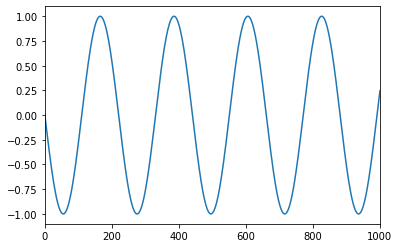

In [123]:
plt.plot(highSquarePass(test_phasor.real, 900))
plt.xlim(0, 1000)